In [1]:
#Import all the necessary modules
import pandas as pandas
import numpy as numpy
import os
import matplotlib.pyplot as matplot
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import itertools
from IPython.display import Image  
from sklearn import tree
from os import system
numpy.random.seed(1234)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Defined set of Visualization, EDA functions for ease of analysis

In [2]:
def plot_confusion_matrix(Y_test,Y_predict, target_names,title='Confusion matrix',cmap=None,normalize=True):
    cm = metrics.confusion_matrix(Y_test, Y_predict)
    accuracy = numpy.trace(cm) / float(numpy.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = matplot.get_cmap('Blues')

    matplot.figure(figsize=(8, 6))
    matplot.imshow(cm, interpolation='nearest', cmap=cmap)
    matplot.title(title)
    matplot.colorbar()

    if target_names is not None:
        tick_marks = numpy.arange(len(target_names))
        matplot.xticks(tick_marks, target_names, rotation=45)
        matplot.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, numpy.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            matplot.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            matplot.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    matplot.tight_layout()
    matplot.ylabel('True label')
    matplot.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    matplot.show()
    print(metrics.classification_report(Y_test, Y_predict))
    model_performance = [metrics.accuracy_score(Y_test, Y_predict),metrics.recall_score(Y_test, Y_predict),
                         metrics.precision_score(Y_test, Y_predict),metrics.f1_score(Y_test, Y_predict) ]
    accuracy_report = pandas.DataFrame(model_performance, columns=['Model_Performance'], 
                                   index=['Accuracy','Recall','Precision','f1_Score'])
    return accuracy_report
    
def EDA_Corr(df):
    corr = df.corr()
    index = corr.columns
    Output = []
    for i in range(0,len(index)):
        i = index[i]
        Pos = corr.index[(corr[i] >= 0.5)].tolist()
        No = corr.index[(corr[i] < 0.5) & (corr[i] > -0.6)].tolist()
        Neg = corr.index[(corr[i] <= -0.5)].tolist()
        leng_u = len(No)
        leng_pos = len(Pos)
        leng_neg = len(Neg)
        Out = [i, leng_u, leng_pos, leng_neg, Pos, Neg, No]
        Output.append(Out)
    fig, ax = matplot.subplots(figsize=(20,10))  
    sns.heatmap(corr,annot=True,vmin=-1,vmax=1,cmap='Blues', linewidths=0, ax = ax)
    Output1 = pandas.DataFrame(Output, columns= ['Feature','Uniqueness','Positive rel', 'inverse rel', 'Pos', 'Neg', 'No'])
    return Output1

def EDA(df):
    EDA = pandas.DataFrame((df.describe()).T)
    EDA["Kurtosis"] = df.kurtosis()
    EDA["Skewness"] = df.skew()
    EDA["Range"] = EDA['max'] -  EDA['min']
    EDA["IQR"] = EDA['75%'] -  EDA['25%']
    return EDA

In [3]:
os.chdir("C:\Siddhartha\Personal Documents\BOK\AIML")

In [4]:
Source = pandas.read_csv("parkinsons_data.csv")

# Understand the data set

Approach Taken :
    
Data skimmed through to see what are the variables present, data type, shape, column names, mixed data types, missing values etc


In [5]:
Source.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [6]:
Source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

In [7]:
Source.shape

(195, 24)

In [8]:
So = Source.iloc[:,1:24]
So.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [9]:
So[~So.applymap(numpy.isreal).all(1)]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE


In [10]:
Source["status"].value_counts()

1    147
0     48
Name: status, dtype: int64

In [11]:
Source["status"] = pandas.Categorical(Source["status"])

In [12]:
Source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null category
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null f

# Exploratory Data Analysis - Data Wrangling and Pre-processing

# Approach Taken

1. Analyse 5 pont summary, Kurtosis, Skewness and Range
2. Analyse the distribution of the data for each variable
3. Analyse outliers using Box plot
4. Infer the results and assess the impact 
5. Perform correlation analysis and VIF to determine the relationships between X's
6. Determine the data transformation and treatment requirements like missing values, outliers, scaling etc
7. Choose the set of predictors which can be used for modelling
8. Remove outliers

In [13]:
EDA = EDA(Source)

In [14]:
EDA

,count,mean,std,min,25%,50%,75%,max,Kurtosis,Skewness,Range,IQR
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000,-0.627898,0.591737,171.772000,65.197000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000,7.627241,2.542146,489.885000,89.343000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000,0.654615,1.217350,173.694000,55.727500
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160,12.030939,3.084946,0.031480,0.003905
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260,10.869043,2.649071,0.000253,0.000040
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440,14.213798,3.360708,0.020760,0.002175
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580,11.963922,3.073892,0.018660,0.002095
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330,14.224762,3.362058,0.062290,0.006520
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080,3.238308,1.666480,0.109540,0.021380
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000,5.128193,1.999389,1.217000,0.201500


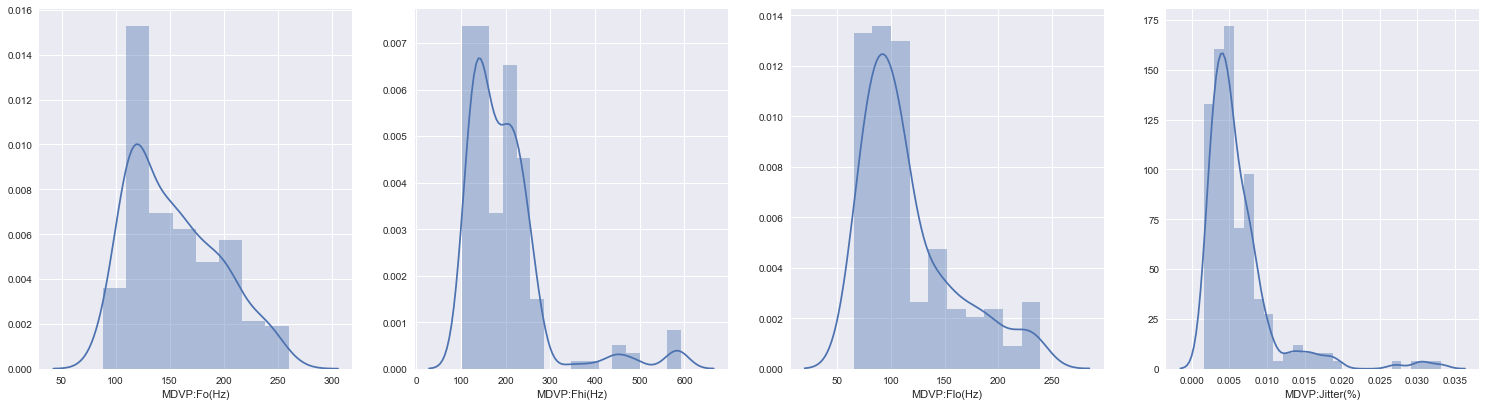

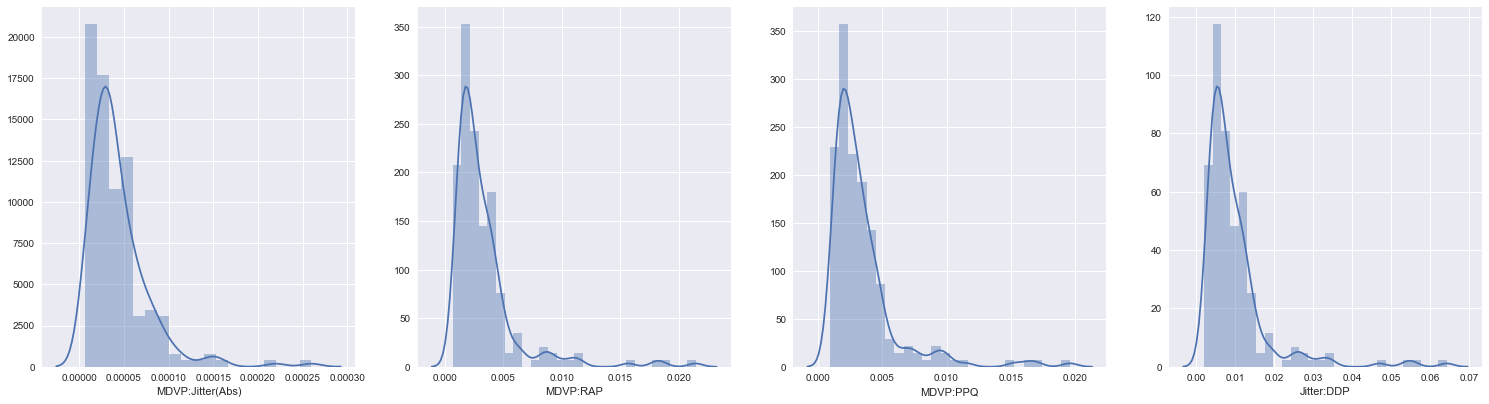

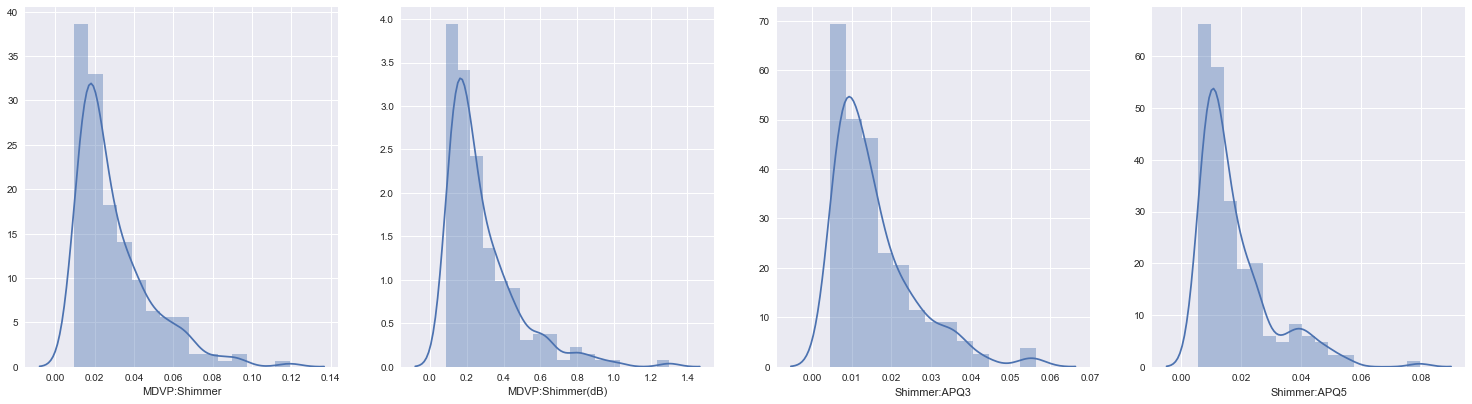

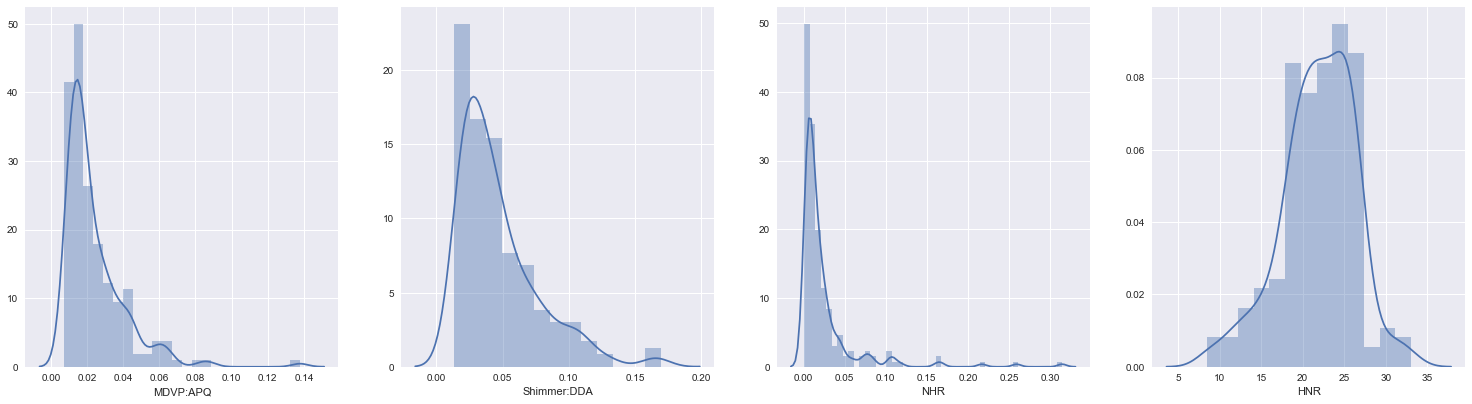

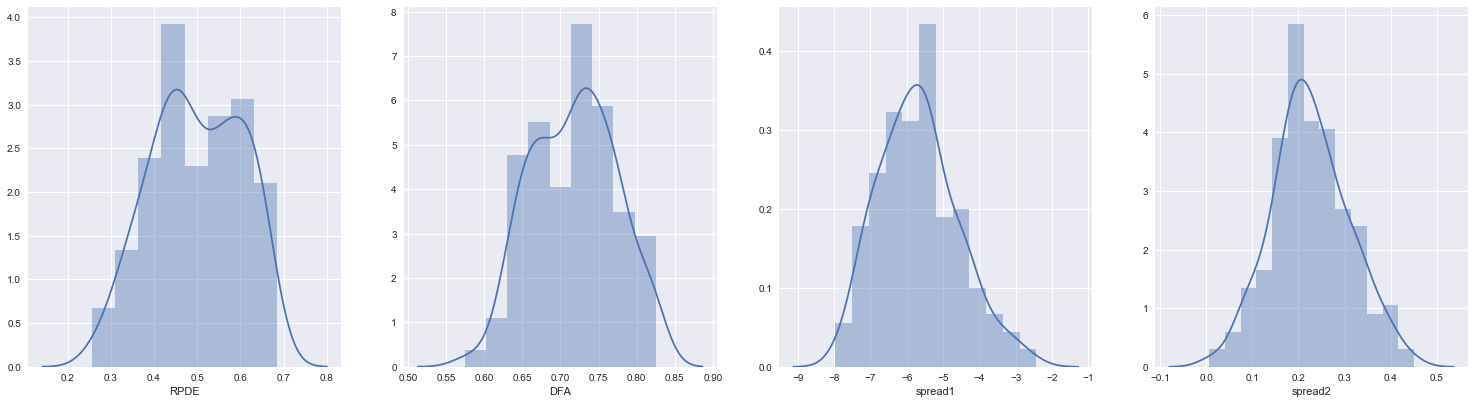

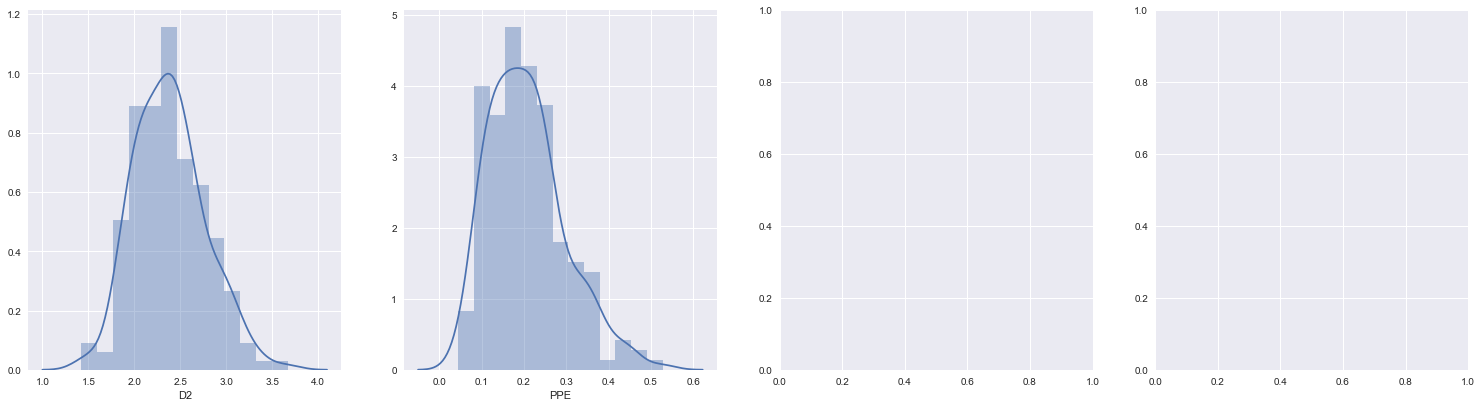

In [15]:
f, axes = matplot.subplots(1, 4, figsize=(10, 10))
sns.distplot(Source['MDVP:Fo(Hz)'], ax = axes[0])
sns.distplot(Source['MDVP:Fhi(Hz)'], ax = axes[1])
sns.distplot(Source['MDVP:Flo(Hz)'], ax = axes[2])
sns.distplot(Source['MDVP:Jitter(%)'], ax = axes[3])
matplot.subplots_adjust(top =  1.5, right = 10, left = 8, bottom = 1)

f, axes = matplot.subplots(1, 4, figsize=(10, 10))
sns.distplot(Source['MDVP:Jitter(Abs)'], ax = axes[0])
sns.distplot(Source['MDVP:RAP'], ax = axes[1])
sns.distplot(Source['MDVP:PPQ'], ax = axes[2])
sns.distplot(Source['Jitter:DDP'], ax = axes[3])
matplot.subplots_adjust(top =  1.5, right = 10, left = 8, bottom = 1)

f, axes = matplot.subplots(1, 4, figsize=(10, 10))
sns.distplot(Source['MDVP:Shimmer'], ax = axes[0] )
sns.distplot(Source['MDVP:Shimmer(dB)'], ax = axes[1] )
sns.distplot(Source['Shimmer:APQ3'], ax = axes[2] )
sns.distplot(Source['Shimmer:APQ5'], ax = axes[3] )
matplot.subplots_adjust(top =  1.5, right = 10, left = 8, bottom = 1)

f, axes = matplot.subplots(1, 4, figsize=(10, 10))
sns.distplot(Source['MDVP:APQ'], ax = axes[0] )
sns.distplot(Source['Shimmer:DDA'], ax = axes[1] )
sns.distplot(Source['NHR'], ax = axes[2] )
sns.distplot(Source['HNR'], ax = axes[3] )
matplot.subplots_adjust(top =  1.5, right = 10, left = 8, bottom = 1)

f, axes = matplot.subplots(1, 4, figsize=(10, 10))
sns.distplot(Source['RPDE'], ax = axes[0] )
sns.distplot(Source['DFA'], ax = axes[1] )
sns.distplot(Source['spread1'], ax = axes[2] )
sns.distplot(Source['spread2'], ax = axes[3] )
matplot.subplots_adjust(top =  1.5, right = 10, left = 8, bottom = 1)

f, axes = matplot.subplots(1, 4, figsize=(10, 10))
sns.distplot(Source['D2'], ax = axes[0] )
sns.distplot(Source['PPE'], ax = axes[1] )
matplot.subplots_adjust(top =  1.5, right = 10, left = 8, bottom = 1)

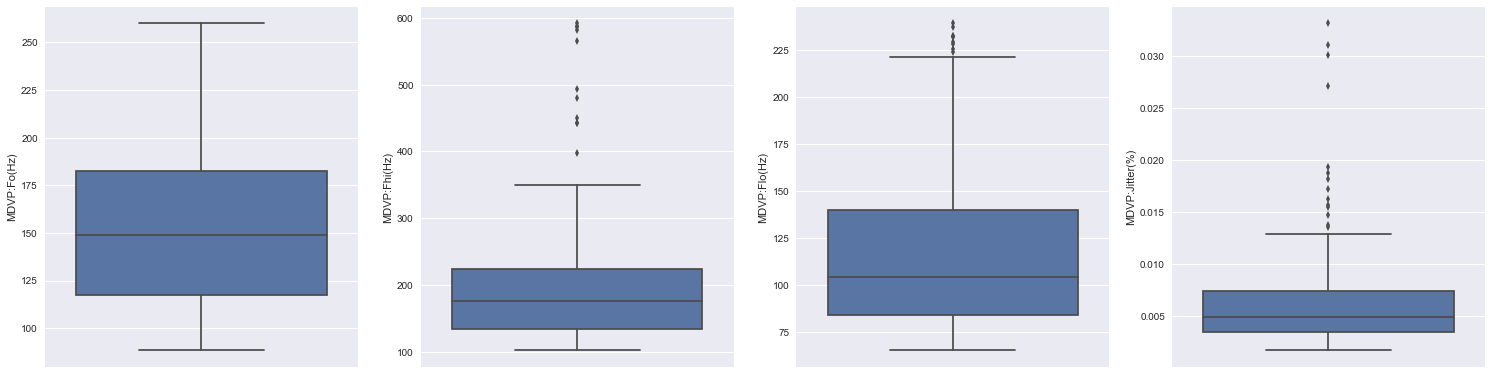

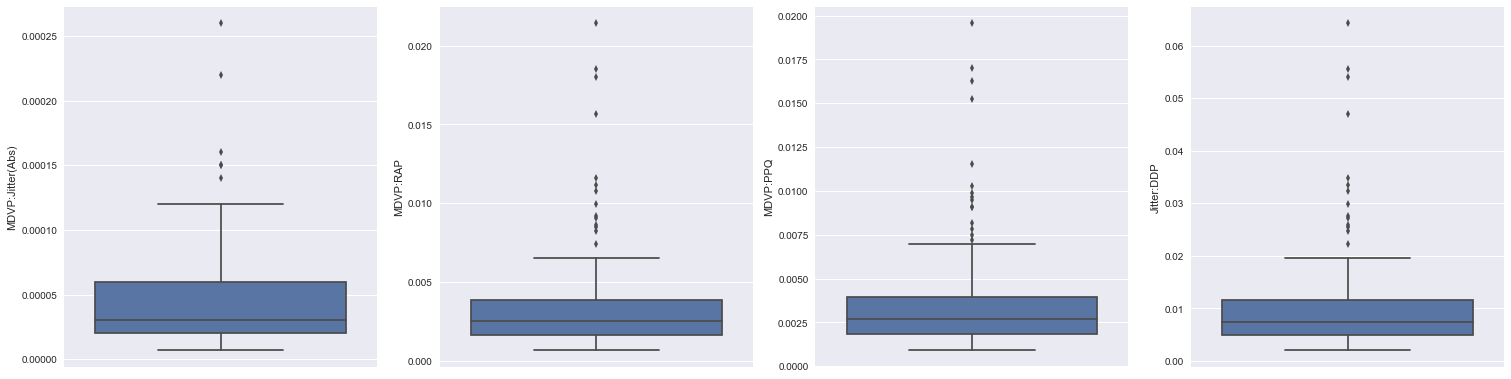

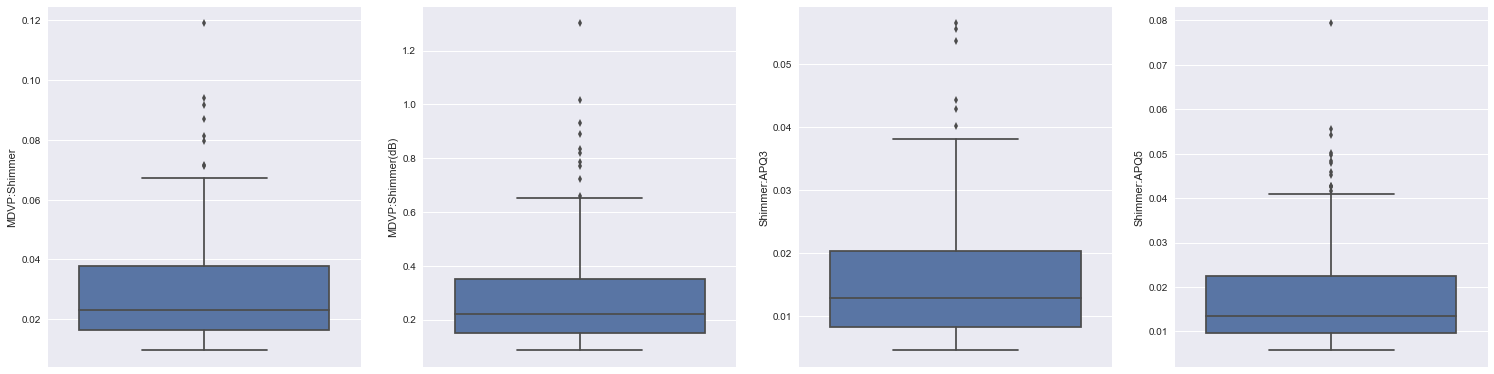

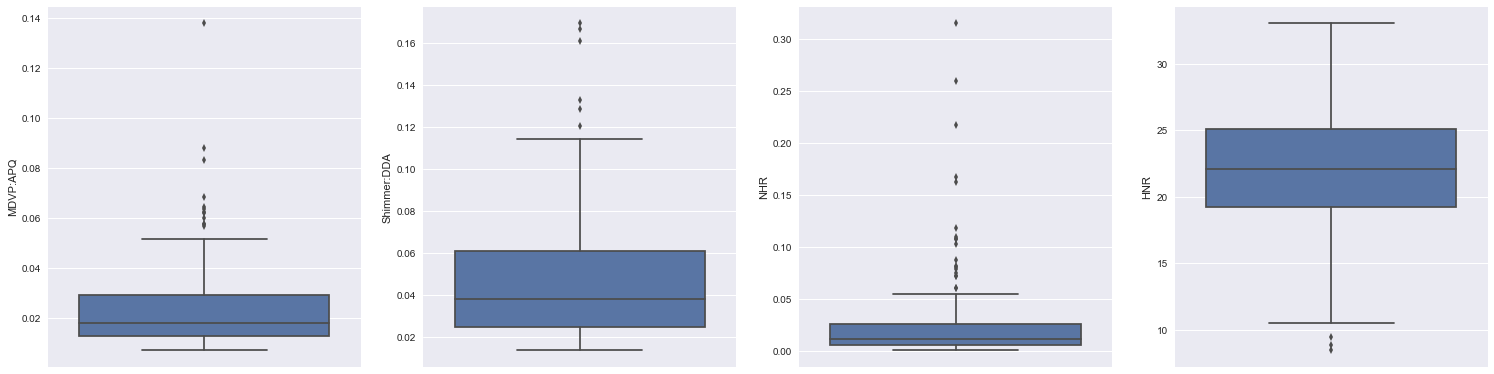

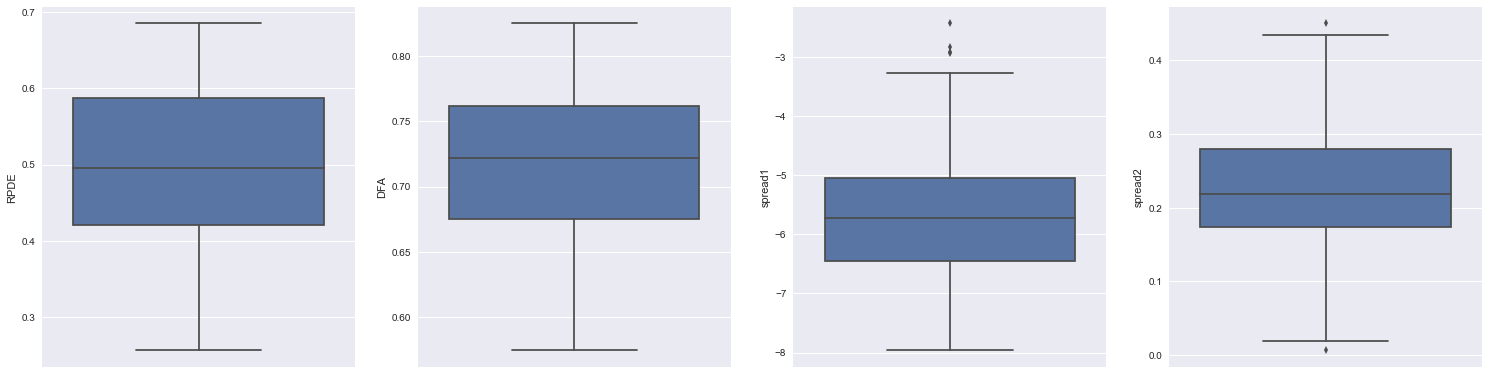

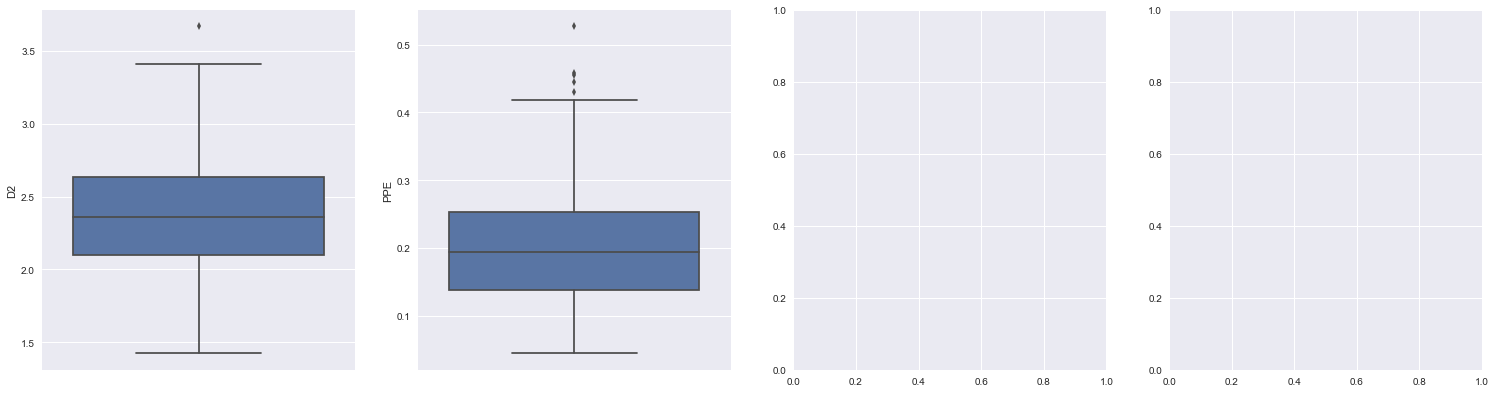

In [16]:
f, axes = matplot.subplots(1, 4, figsize=(10, 10))
sns.boxplot(Source['MDVP:Fo(Hz)'], ax = axes[0], orient='v')
sns.boxplot(Source['MDVP:Fhi(Hz)'], ax = axes[1], orient='v')
sns.boxplot(Source['MDVP:Flo(Hz)'], ax = axes[2], orient='v')
sns.boxplot(Source['MDVP:Jitter(%)'], ax = axes[3], orient='v')
matplot.subplots_adjust(top =  1.5, right = 10, left = 8, bottom = 1)

f, axes = matplot.subplots(1, 4, figsize=(10, 10))
sns.boxplot(Source['MDVP:Jitter(Abs)'], ax = axes[0], orient='v')
sns.boxplot(Source['MDVP:RAP'], ax = axes[1], orient='v')
sns.boxplot(Source['MDVP:PPQ'], ax = axes[2], orient='v')
sns.boxplot(Source['Jitter:DDP'], ax = axes[3], orient='v')
matplot.subplots_adjust(top =  1.5, right = 10, left = 8, bottom = 1)

f, axes = matplot.subplots(1, 4, figsize=(10, 10))
sns.boxplot(Source['MDVP:Shimmer'], ax = axes[0], orient='v')
sns.boxplot(Source['MDVP:Shimmer(dB)'], ax = axes[1], orient='v')
sns.boxplot(Source['Shimmer:APQ3'], ax = axes[2], orient='v')
sns.boxplot(Source['Shimmer:APQ5'], ax = axes[3], orient='v')
matplot.subplots_adjust(top =  1.5, right = 10, left = 8, bottom = 1)

f, axes = matplot.subplots(1, 4, figsize=(10, 10))
sns.boxplot(Source['MDVP:APQ'], ax = axes[0], orient='v')
sns.boxplot(Source['Shimmer:DDA'], ax = axes[1], orient='v')
sns.boxplot(Source['NHR'], ax = axes[2], orient='v')
sns.boxplot(Source['HNR'], ax = axes[3], orient='v')
matplot.subplots_adjust(top =  1.5, right = 10, left = 8, bottom = 1)

f, axes = matplot.subplots(1, 4, figsize=(10, 10))
sns.boxplot(Source['RPDE'], ax = axes[0], orient='v')
sns.boxplot(Source['DFA'], ax = axes[1], orient='v')
sns.boxplot(Source['spread1'], ax = axes[2], orient='v')
sns.boxplot(Source['spread2'], ax = axes[3], orient='v')
matplot.subplots_adjust(top =  1.5, right = 10, left = 8, bottom = 1)

f, axes = matplot.subplots(1, 4, figsize=(10, 10))
sns.boxplot(Source['D2'], ax = axes[0], orient='v')
sns.boxplot(Source['PPE'], ax = axes[1], orient='v')
matplot.subplots_adjust(top =  1.5, right = 10, left = 8, bottom = 1)

MDVP:Fo(Hz)	:
1. Range 171.77 and Std Dev 41.39 suggests that there is a large spread of data from the median
2. Kurtosis -0.62 suggests that light tails or less data is distributed around the tails. However this is not a strong negative and hence a thin tail can be observed
3. Skewness 0.59 suggests that the data is positively skewed. The strength of the skewness is less and hence need to evaluate whether transformation (scalar or log or exp)
4. Box plot suggests that there are no outliers in the data albeit the spread is large

MDVP:Fhi(Hz)	:
1. Range 489.885 and Std Dev 91.49 suggests that there is a large spread of data from the median and the data may have outliers
2. Kurtosis 7.62 suggests that there is a heavy tail and more data points are distributed around the tail. This is evident in the box plot
3. Skewness 2.542 suggests that the data is positively skewed. The strength of the skewness is high and hence if this feature is used as predictor, transformation is required
4. Box plot suggests that there are outliers in the data and this needs treatment before building model
5. Distplot shows there is a slight bi-modal distribution indicating a possible gaussian mixture. This however is a risk that needs to be accepted for this project
6. Distplot shows that there is narrow arear where data is distributed 

MDVP:Flo(Hz) :
1. Range 173.69 and std dev 43.52 suggests that the spread of the data is large
2. Kurtosis 0.654 suggests that there is strong tail. This is evident in distribution plot and box plot
3. Skewness is 1.217 suggests that the data is positively skewed. The strength of the skewness is high & hence if this feature is used as predictor, transformation is required
4. Box plot suggests that there are outliers and this needs treatment before building model


'MDVP:Jitter(%)' :
1. Range 0.031480 and std dev 0.004848 suggests that there is a wide spread of data given the scale of data points
2. Kurtosis 12.03 is the 4th highest amongst all 22 variables of the data set indicates a strong tail or large data distribution around the tail. This needs treatment
3. Skewness is 3.0849 suggests positive skewness of data. THis is evident in distribution plot and box plot. Data transformation is required to handle this skewness
4. The outliers are quite a number for this variable and is evident in box plot

'MDVP:Jitter(Abs)' :
1. Range 0.000253 and std dev 0.000035 suggests that there is a wide spread of data given the scale of data points
2. Kurtosis 10.86 is one of the highest amongst all 22 variables of the data set indicates a strong tail or large data distribution around the tail. This needs treatment
3. Skewness is 2.649 suggests positive skewness of data. THis is evident in distribution plot and box plot. Data transformation is required to handle this skewness
4. The outliers are quite a number for this variable and is evident in box plot

'MDVP:RAP' :
1. Range 0.020760 and std dev 0.002968 suggests that there is a fair amount of spread of data given the scale of data points
2. Kurtosis 14.213 is the 3rd highest amongst all 22 variables of the data set indicates a strong tail or large data distribution around the tail. This needs treatment
3. Skewness is 3.360 suggests positive skewness of data. THis is evident in distribution plot and box plot. Data transformation is required to handle this skewness
4. The outliers are quite a number for this variable and is evident in box plot
5. The distribution plot indicates 2 small peaks at the long tail indicating possible gaussian miture however since its small, this may or may not impact models

'MDVP:PPQ' :
1. Range 0.018660 and std dev 0.002759 suggests that the spread of the data is large
2. Kurtosis 11.963922 is one of the highest amongst all 22 variables of the data set indicates a strong tail or large data distribution around the tail. This needs treatment
3. Skewness is 3.073892 suggests that the data is positively skewed. The strength of the skewness is high & hence if this feature is used as predictor, transformation is required
4. Box plot suggests that there are outliers and this needs treatment before building model
5. The distribution plot indicates small peaks at the long tail indicating possible gaussian miture however since its small, this may or may not impact models

'Jitter:DDP' :
1. Range 0.062290 and std dev 0.008903 suggests that the spread of the data is large
2. Kurtosis 14.224762 is the 2nd highest amongst all 22 variables of the data set indicates a strong tail or large data distribution around the tail. This needs treatment
3. Skewness is 3.362058 suggests that the data is positively skewed. The strength of the skewness is high & hence if this feature is used as predictor, transformation is required
4. Box plot suggests that there are outliers and this needs treatment before building model
5. Distribution plot clearly shows the inference made through Skewness and Kurtosis, the long tail and +ve skewness is very evident

'MDVP:Shimmer' : 
1. Range 0.109540 and std dev 0.018857 suggests that there is a wide spread of data given the scale of data points
2. Kurtosis 3.238308 shows there is a small tail or data is distributed along the tail. Though this is small it requires treatment
3. Skewness is 1.666480 suggests positive skewness of data. THis is evident in distribution plot and box plot. Data transformation is required to handle this skewness
4. The outliers are quite a number for this variable and is evident in box plot. This will have to be treated before model building

'MDVP:Shimmer(dB)' : 
1. Range 1.217000 and std dev 0.194877 suggests that there is a wide spread of data given the scale of data points
2. Kurtosis 5.128193 shows there is a small tail or data is distributed along the tail. Though this is small it requires treatment
3. Skewness is 1.999389 suggests positive skewness of data. THis is evident in distribution plot and box plot. Data transformation is required to handle this skewness
4. The outliers are quite a number for this variable and is evident in box plot. This will have to be treated before model building

'Shimmer:APQ3' :
1. Range 0.051920 and std dev 0.010153 suggests that there is a wide spread of data given the scale of data points
2. Kurtosis 2.720152 shows there is a small tail or data is distributed along the tail. Though this is small it requires treatment
3. Skewness is 1.580576 suggests positive skewness of data. THis is evident in distribution plot and box plot. Data transformation is required to handle this skewness
4. The outliers are few for this variable and is evident in box plot. This will have to be treated before model building

'Shimmer:APQ5' : 
1. Range 0.073700 and std dev 0.012024 suggests that there is a wide spread of data given the scale of data points
2. Kurtosis 3.874210 shows there is a small tail or data is distributed along the tail. Though this is small it requires treatment
3. Skewness is 1.798697 suggests positive skewness of data. THis is evident in distribution plot and box plot. Data transformation is required to handle this skewness
4. The outliers are few for this variable and is evident in box plot. This will have to be treated before model building
5. The distribution plot indicates small peaks at the long tail indicating possible gaussian miture however since its small, this may or may not impact models

'MDVP:APQ' : 
1. Range 0.130590 and std dev 0.016947 suggests that there is a wide spread of data given the scale of data points
2. Kurtosis 11.163288 is one of the highest amongst all 22 variables of the data set indicates a strong tail or large data distribution around the tail. This needs treatment
3. Skewness is 2.618047 suggests positive skewness of data. THis is evident in distribution plot and box plot. Data transformation is required to handle this skewness
4. The outliers are few for this variable and is evident in box plot. This will have to be treated before model building

'Shimmer:DDA' : 
1. Range 0.155780 and std dev 0.030459 suggests that there is a wide spread of data given the scale of data points
2. Kurtosis 2.720661 shows there is a small tail or data is distributed along the tail. Though this is small it requires treatment
3. Skewness is 1.580618 suggests positive skewness of data. THis is evident in distribution plot and box plot. Data transformation is required to handle this skewness
4. The outliers are few for this variable and is evident in box plot. This will have to be treated before model building

'NHR' :
1. Range 0.314170 and std dev 0.040418 suggests that there is a wide spread of data given the scale of data points
2. Kurtosis 21.994974 is the highest amongst all 22 variables of the data set indicates a strong tail or large data distribution around the tail. This needs treatment
3. Skewness is 4.220709 is the highest amongst all 22 variables shows strong positive skewness of data. THis is evident in distribution plot and box plot.
   Data transformation is required to handle this skewness
4. This variables has quite a lot of outliers and this will have to treated before model building

'HNR' :
1. Range 24.606000 and std dev 4.425764 suggests that there is a wide spread of data given the scale of data points
2. Kurtosis 0.616036 shows there is a small tail or data is distributed along the tail. Though this is small it requires treatment
3. Skewness is -0.514317 suggests negative skewness of data. This is evident in distribution plot and box plot. Data transformation is required to handle this skewness
4. The outliers are few for this variable and is evident in box plot. This will have to be treated before model building
5. The distribution of data shows a small double peak indicating a possible gaussian mixture. This however is a risk that needs to be accepted for this project

'RPDE' :
1. Range 0.428581 and std dev 0.103942 suggests that there is a wide spread of data given the scale of data points
2. Kurtosis -0.921781 suggests light tails or less data is distributed around the tails. However this is not a strong negative and hence a thin tail can be observed
3. Skewness is -0.143402 suggests negative skewness of data. This is evident in distribution plot and box plot. Data transformation is required to handle this skewness
4. Boxplot shows there are no outliers and hence no special treatment required
5. The distribution of data shows a  double peak indicating a possible gaussian mixture. This however is a risk that needs to be accepted for this project

'DFA' : 
1. Range 0.251006 and std dev 0.055336 suggests that there is a wide spread of data given the scale of data points
2. Kurtosis -0.686152 suggests light tails or less data is distributed around the tails. However this is not a strong negative and hence a thin tail can be observed
3. Skewness is -0.033214 suggests negative skewness of data. This is evident in distribution plot and box plot. Data transformation is required to handle this skewness
4. Boxplot shows there are no outliers and hence no special treatment required
5. The distribution of data shows a  double peak indicating a possible gaussian mixture. This however is a risk that needs to be accepted for this project

'spread1' :
1. Range 5.530953 and std dev 1.090208 suggests that there is a wide spread of data given the scale of data points
2. Kurtosis 0.050199 suggests light tails or less data is distributed around the tails. However this is not a strong negative and hence a thin tail can be observed
3. Skewness is 0.432139 suggests positive skewness of data. This is evident in distribution plot and box plot. Data transformation is required to handle this skewness
4. The outliers are few for this variable and is evident in box plot. This will have to be treated before model building
5. The distribution of data shows a a good symmetry when compared. 

'spread2' :
1. Range 0.444219 and std dev 0.083406 suggests that there is a wide spread of data given the scale of data points
2. Kurtosis -0.083023 suggests light tails or less data is distributed around the tails. However this is not a strong negative and hence a thin tail can be observed
3. Skewness is 0.144430 suggests positive skewness of data. This is evident in distribution plot and box plot. Data transformation is required to handle this skewness
4. The outliers are two data point for this variable and is evident in box plot. This will have to be treated before model building
5. The distribution of data shows a a good symmetry when compared. 

'D2' : 
1. Range 2.247868 and Std Dev 0.382799 suggests that there is a large spread of data from the median and the data may have outliers
2. Kurtosis 0.220334 suggests that there is a heavy tail and more data points are distributed around the tail. This is evident in the box plot
3. Skewness 0.430384 suggests that the data is positively skewed. The strength of the skewness is high and hence if this feature is used as predictor, transformation is required
4. The outliers is only one data point for this variable and is evident in box plot. This will have to be treated before model building
5. The distribution of data shows a a good symmetry when compared. 

'PPE' :
1. Range 0.482828 and Std Dev 0.090119 suggests that there is a large spread of data from the median and the data may have outliers
2. Kurtosis 0.528335 suggests that there is a heavy tail and more data points are distributed around the tail. This is evident in the box plot
3. Skewness 0.797491 suggests that the data is positively skewed. The strength of the skewness is high and hence if this feature is used as predictor, transformation is required
4. The outliers are few for this variable and is evident in box plot. This will have to be treated before model building

The features are of different scales and hence normalization - scalar, log or exp may have to be done

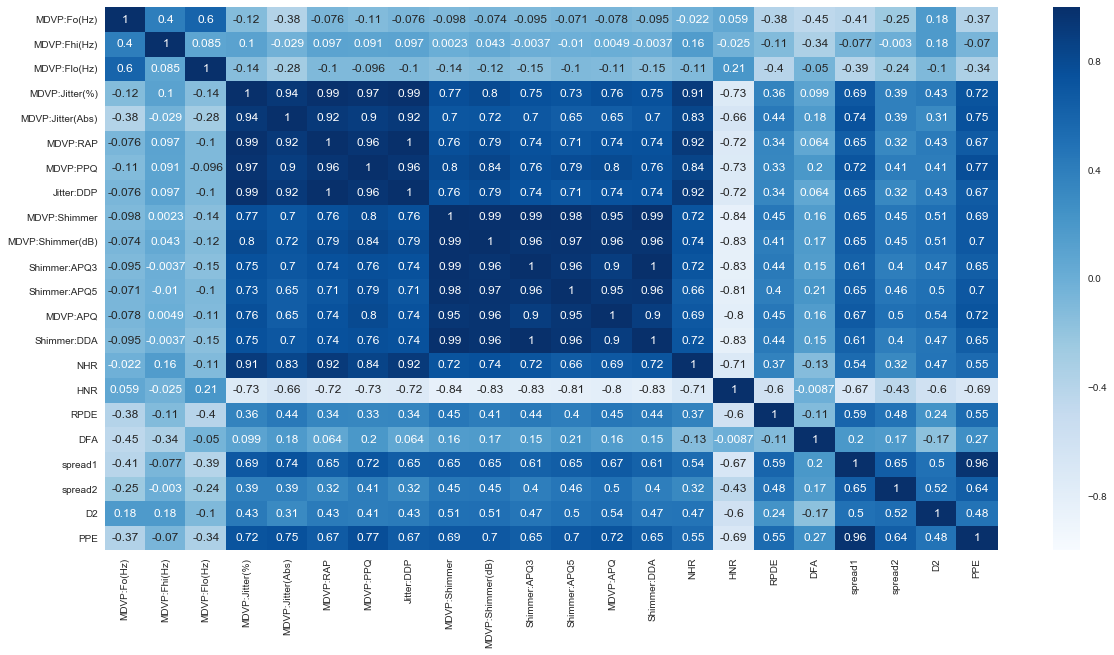

In [17]:
EDA_Corr_Results = pandas.DataFrame(EDA_Corr(Source))

In [18]:
(EDA_Corr_Results.sort_values("Uniqueness", ascending= False)).head(10)

,Feature,Uniqueness,Positive rel,inverse rel,Pos,Neg,No
1,MDVP:Fhi(Hz),21,1,0,[MDVP:Fhi(Hz)],[],"[MDVP:Fo(Hz), MDVP:Flo(Hz), MDVP:Jitter(%), MD..."
17,DFA,21,1,0,[DFA],[],"[MDVP:Fo(Hz), MDVP:Fhi(Hz), MDVP:Flo(Hz), MDVP..."
0,MDVP:Fo(Hz),20,2,0,"[MDVP:Fo(Hz), MDVP:Flo(Hz)]",[],"[MDVP:Fhi(Hz), MDVP:Jitter(%), MDVP:Jitter(Abs..."
2,MDVP:Flo(Hz),20,2,0,"[MDVP:Fo(Hz), MDVP:Flo(Hz)]",[],"[MDVP:Fhi(Hz), MDVP:Jitter(%), MDVP:Jitter(Abs..."
16,RPDE,19,3,1,"[RPDE, spread1, PPE]",[HNR],"[MDVP:Fo(Hz), MDVP:Fhi(Hz), MDVP:Flo(Hz), MDVP..."
19,spread2,17,5,0,"[MDVP:APQ, spread1, spread2, D2, PPE]",[],"[MDVP:Fo(Hz), MDVP:Fhi(Hz), MDVP:Flo(Hz), MDVP..."
20,D2,15,6,1,"[MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ5,...",[HNR],"[MDVP:Fo(Hz), MDVP:Fhi(Hz), MDVP:Flo(Hz), MDVP..."
3,MDVP:Jitter(%),7,14,1,"[MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, M...",[HNR],"[MDVP:Fo(Hz), MDVP:Fhi(Hz), MDVP:Flo(Hz), RPDE..."
4,MDVP:Jitter(Abs),7,14,1,"[MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, M...",[HNR],"[MDVP:Fo(Hz), MDVP:Fhi(Hz), MDVP:Flo(Hz), RPDE..."
5,MDVP:RAP,7,14,1,"[MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, M...",[HNR],"[MDVP:Fo(Hz), MDVP:Fhi(Hz), MDVP:Flo(Hz), RPDE..."


In [19]:
(EDA_Corr_Results.sort_values("Positive rel", ascending= False)).head(15)

,Feature,Uniqueness,Positive rel,inverse rel,Pos,Neg,No
21,PPE,5,16,1,"[MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, M...",[HNR],"[MDVP:Fo(Hz), MDVP:Fhi(Hz), MDVP:Flo(Hz), DFA,..."
18,spread1,5,16,1,"[MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, M...",[HNR],"[MDVP:Fo(Hz), MDVP:Fhi(Hz), MDVP:Flo(Hz), DFA,..."
12,MDVP:APQ,5,16,1,"[MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, M...",[HNR],"[MDVP:Fo(Hz), MDVP:Fhi(Hz), MDVP:Flo(Hz), RPDE..."
8,MDVP:Shimmer,6,15,1,"[MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, M...",[HNR],"[MDVP:Fo(Hz), MDVP:Fhi(Hz), MDVP:Flo(Hz), RPDE..."
9,MDVP:Shimmer(dB),6,15,1,"[MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, M...",[HNR],"[MDVP:Fo(Hz), MDVP:Fhi(Hz), MDVP:Flo(Hz), RPDE..."
11,Shimmer:APQ5,6,15,1,"[MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, M...",[HNR],"[MDVP:Fo(Hz), MDVP:Fhi(Hz), MDVP:Flo(Hz), RPDE..."
6,MDVP:PPQ,7,14,1,"[MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, M...",[HNR],"[MDVP:Fo(Hz), MDVP:Fhi(Hz), MDVP:Flo(Hz), RPDE..."
7,Jitter:DDP,7,14,1,"[MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, M...",[HNR],"[MDVP:Fo(Hz), MDVP:Fhi(Hz), MDVP:Flo(Hz), RPDE..."
5,MDVP:RAP,7,14,1,"[MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, M...",[HNR],"[MDVP:Fo(Hz), MDVP:Fhi(Hz), MDVP:Flo(Hz), RPDE..."
4,MDVP:Jitter(Abs),7,14,1,"[MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, M...",[HNR],"[MDVP:Fo(Hz), MDVP:Fhi(Hz), MDVP:Flo(Hz), RPDE..."


In [20]:
(EDA_Corr_Results.sort_values("Neg", ascending= False)).head(10)

,Feature,Uniqueness,Positive rel,inverse rel,Pos,Neg,No
15,HNR,6,1,16,[HNR],"[MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, M...","[MDVP:Fo(Hz), MDVP:Fhi(Hz), MDVP:Flo(Hz), RPDE..."
11,Shimmer:APQ5,6,15,1,"[MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, M...",[HNR],"[MDVP:Fo(Hz), MDVP:Fhi(Hz), MDVP:Flo(Hz), RPDE..."
10,Shimmer:APQ3,7,14,1,"[MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, M...",[HNR],"[MDVP:Fo(Hz), MDVP:Fhi(Hz), MDVP:Flo(Hz), RPDE..."
20,D2,15,6,1,"[MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ5,...",[HNR],"[MDVP:Fo(Hz), MDVP:Fhi(Hz), MDVP:Flo(Hz), MDVP..."
18,spread1,5,16,1,"[MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, M...",[HNR],"[MDVP:Fo(Hz), MDVP:Fhi(Hz), MDVP:Flo(Hz), DFA,..."
16,RPDE,19,3,1,"[RPDE, spread1, PPE]",[HNR],"[MDVP:Fo(Hz), MDVP:Fhi(Hz), MDVP:Flo(Hz), MDVP..."
14,NHR,7,14,1,"[MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, M...",[HNR],"[MDVP:Fo(Hz), MDVP:Fhi(Hz), MDVP:Flo(Hz), RPDE..."
13,Shimmer:DDA,7,14,1,"[MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, M...",[HNR],"[MDVP:Fo(Hz), MDVP:Fhi(Hz), MDVP:Flo(Hz), RPDE..."
12,MDVP:APQ,5,16,1,"[MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, M...",[HNR],"[MDVP:Fo(Hz), MDVP:Fhi(Hz), MDVP:Flo(Hz), RPDE..."
21,PPE,5,16,1,"[MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, M...",[HNR],"[MDVP:Fo(Hz), MDVP:Fhi(Hz), MDVP:Flo(Hz), DFA,..."


Correlation Analysis Inference :

1. 7 out of 22 Variables - MDVP:Fhi(Hz), DFA, MDVP:Fo(Hz), MDVP:Flo(Hz)	, RPDE, spread2, D2 have less correlationships with other Xs. This means that they can be 
   potentially a good predictor
2. 14 out of 22 Variables - PPE, spread1, MDVP:APQ, MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ5, MDVP:PPQ, Jitter:DDP, MDVP:RAP, MDVP:Jitter(Abs), Shimmer:APQ3, 
   MDVP:Jitter(%), Shimmer:DDA, NHR are influenced by other variables & each other positively. This means there can be an infleuncing factor compounded may resulting
   in all or some of them being poor predictors. During model building, these will have to be used judiciously
3. HNR is one variable which has inverse relationship with 16 out of remaining 21 variables. This again will have to be used judiciously during model building

In [21]:
predictor_variables_VIF = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE']

df_predictor = Source[predictor_variables_VIF].copy(deep = True)
df_predictor = df_predictor.dropna()

from statsmodels.stats.outliers_influence import variance_inflation_factor
threshold = 90
for i in numpy.arange(0,len(predictor_variables_VIF)):
    vif = [variance_inflation_factor(df_predictor[predictor_variables_VIF].values, j) 
    for j in range(df_predictor[predictor_variables_VIF].shape[1])]
    maxindex = vif.index(max(vif))
    if max(vif) > threshold:
        print ("VIF :", vif)
        print('Eliminating \'' + df_predictor[predictor_variables_VIF].columns[maxindex] + '\' at index: ' + str(maxindex))
        del predictor_variables_VIF[maxindex]
    else:
        break

VIF : [102.24280631791903, 8.880350536797312, 18.052013539237628, 506.5605772333946, 122.71653636974996, 3101964.4474472366, 273.80358054665885, 3103948.971368636, 2653.6566437974852, 303.10240663427453, 51152986.518916376, 342.8411494976046, 184.053596687299, 51126303.41158492, 15.997170158466337, 132.1105076175144, 55.61440733368685, 414.9149970372411, 384.36956548994027, 23.076220605637296, 112.6540941697836, 133.49126986950432]
Eliminating 'Shimmer:APQ3' at index: 10
VIF : [102.08571353647486, 8.84440723552668, 17.83615150694615, 506.35118357076493, 121.49489512712937, 3074404.005840138, 273.77673853771677, 3075797.7774366443, 2637.2740773350524, 302.3662747467406, 342.83856457193826, 182.8221323282738, 742.4362680946554, 15.984125168666857, 131.4938083936771, 55.39473393799474, 414.15221765403265, 382.54153367959753, 22.606426709511176, 112.34495609513847, 132.70759375232285]
Eliminating 'Jitter:DDP' at index: 7
VIF : [101.24700337611061, 8.839192223795202, 17.76085982784844, 505.

In [22]:
predictor_variables_VIF.sort()

In [23]:
predictor_variables_VIF

['D2',
 'HNR',
 'MDVP:APQ',
 'MDVP:Fhi(Hz)',
 'MDVP:Flo(Hz)',
 'MDVP:Fo(Hz)',
 'MDVP:Jitter(Abs)',
 'MDVP:PPQ',
 'NHR',
 'PPE',
 'RPDE',
 'Shimmer:DDA',
 'spread2']

In [24]:
predictor_variables_Corr = ['MDVP:Fhi(Hz)', 'DFA', 'MDVP:Fo(Hz)', 'MDVP:Flo(Hz)' , 'RPDE', 'spread2', 'D2' ] 

In [25]:
predictor_variables_Corr.sort()

In [26]:
Predictors1 = list(set(predictor_variables_Corr) & set(predictor_variables_VIF))

In [27]:
Predictors2 = list(set(predictor_variables_Corr) | set(predictor_variables_VIF))

In [28]:
print("Predictor1 = ",Predictors1,'\n\n',"Predictor2 = ", Predictors2, '\n\n',"Predictor_Corr = ",predictor_variables_Corr,
      '\n\n', "Predictor_VIF = ",predictor_variables_VIF,'\n\n')
print("Predictor1 = ",len(Predictors1),'\n\n',"Predictor2 = ", len(Predictors2), '\n\n',"Predictor_Corr = ",len(predictor_variables_Corr),
      '\n\n', "Predictor_VIF = ",len(predictor_variables_VIF))

Predictor1 =  ['MDVP:Fhi(Hz)', 'D2', 'spread2', 'MDVP:Fo(Hz)', 'RPDE', 'MDVP:Flo(Hz)'] 

 Predictor2 =  ['HNR', 'MDVP:Fhi(Hz)', 'DFA', 'D2', 'spread2', 'MDVP:Jitter(Abs)', 'MDVP:APQ', 'MDVP:Fo(Hz)', 'NHR', 'RPDE', 'MDVP:PPQ', 'Shimmer:DDA', 'PPE', 'MDVP:Flo(Hz)'] 

 Predictor_Corr =  ['D2', 'DFA', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Fo(Hz)', 'RPDE', 'spread2'] 

 Predictor_VIF =  ['D2', 'HNR', 'MDVP:APQ', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Fo(Hz)', 'MDVP:Jitter(Abs)', 'MDVP:PPQ', 'NHR', 'PPE', 'RPDE', 'Shimmer:DDA', 'spread2'] 


Predictor1 =  6 

 Predictor2 =  14 

 Predictor_Corr =  7 

 Predictor_VIF =  13


Inference : 

Four sets of Xs choosen to build the model
    1. Predictor_Corr - These are variables chosen based on Correlation analysis
    2. Predictor_VIF - These are variables chosen based on VIF analysis
    3. Predictor1 - These are the variables that appear in both Predictor_Corr and Predictor_VIF
    4. Predictor2 - These are the variables that appear in either in Predictor_Corr or Predictor_VIF

In [29]:
Source['name'].value_counts()

phon_R01_S17_2    1
phon_R01_S13_5    1
phon_R01_S43_1    1
phon_R01_S13_4    1
phon_R01_S33_1    1
phon_R01_S10_1    1
phon_R01_S17_1    1
phon_R01_S24_1    1
phon_R01_S02_1    1
phon_R01_S05_4    1
phon_R01_S10_5    1
phon_R01_S17_5    1
phon_R01_S13_3    1
phon_R01_S43_2    1
phon_R01_S22_6    1
phon_R01_S27_1    1
phon_R01_S04_1    1
phon_R01_S43_4    1
phon_R01_S44_6    1
phon_R01_S50_1    1
phon_R01_S01_2    1
phon_R01_S24_6    1
phon_R01_S35_1    1
phon_R01_S35_4    1
phon_R01_S37_2    1
phon_R01_S26_6    1
phon_R01_S20_6    1
phon_R01_S21_1    1
phon_R01_S01_5    1
phon_R01_S35_6    1
                 ..
phon_R01_S16_6    1
phon_R01_S32_5    1
phon_R01_S37_3    1
phon_R01_S50_5    1
phon_R01_S33_2    1
phon_R01_S24_4    1
phon_R01_S25_3    1
phon_R01_S26_4    1
phon_R01_S26_2    1
phon_R01_S49_3    1
phon_R01_S13_1    1
phon_R01_S42_2    1
phon_R01_S04_6    1
phon_R01_S01_1    1
phon_R01_S25_2    1
phon_R01_S39_2    1
phon_R01_S21_4    1
phon_R01_S05_2    1
phon_R01_S39_4    1


Outlier treatment approach :

~26% data are outliers and hence removing all will have an impact on the quantity of data available for modelling

Hence below is the approach taken

    1. Remove only the rows that has maximum outliers
    2. impute the remaining rows using respective column median

In [30]:
Subset = Source[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE']]

Subset_Columns = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE']

a = Subset > Subset.quantile(0.75) + (1.5 * EDA['IQR'])
b = Subset < Subset.quantile(0.25) - (1.5 * EDA['IQR'])
Source[["Q31","Q32","Q33","Q34","Q35","Q36","Q37","Q38","Q39","Q310","Q311","Q312","Q313","Q314",
        "Q315","Q316","Q317","Q318","Q319","Q320","Q321","Q322"]] = a
Source[["Q11","Q12","Q13","Q14","Q15","Q16","Q17","Q18","Q19","Q110","Q111","Q112","Q113","Q114",
        "Q115","Q116","Q117","Q118","Q119","Q120","Q121","Q122"]] = b

columns = ['Q31', 'Q32', 'Q33', 'Q34', 'Q35',
       'Q36', 'Q37', 'Q38', 'Q39', 'Q310', 'Q311', 'Q312', 'Q313', 'Q314',
       'Q315', 'Q316', 'Q317', 'Q318', 'Q319', 'Q320', 'Q321', 'Q322', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q110', 'Q111',
       'Q112', 'Q113', 'Q114', 'Q115', 'Q116', 'Q117', 'Q118', 'Q119', 'Q120',
       'Q121', 'Q122']

Q1 =  ['Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q110', 'Q111',
       'Q112', 'Q113', 'Q114', 'Q115', 'Q116', 'Q117', 'Q118', 'Q119', 'Q120',
       'Q121', 'Q122']

Q3 =  ['Q31', 'Q32', 'Q33', 'Q34', 'Q35',
       'Q36', 'Q37', 'Q38', 'Q39', 'Q310', 'Q311', 'Q312', 'Q313', 'Q314',
       'Q315', 'Q316', 'Q317', 'Q318', 'Q319', 'Q320', 'Q321', 'Q322']

In [31]:
Q1_Outliers = []
Q1_j = []
Q3_Outliers = []
Q3_j = []
for i in range(0,len(Q1)):
    i = Q1[i]
    No = Source.shape[0] - Source[i].value_counts()[0]
    Q1_Outliers.append(No)
    Q1_j.append(i)
Q1_Col = pandas.DataFrame(Q1_j, columns=["Q1"])
Q1_outliers = pandas.DataFrame(Q1_Outliers, columns=["Q1 Outliers"])
Outliers_impact_Q1 = Q1_Col.join(Q1_outliers)

for i in range(0,len(Q3)):
    i = Q3[i]
    No = Source.shape[0] - Source[i].value_counts()[0]
    Q3_Outliers.append(No)
    Q3_j.append(i)
Q3_Col = pandas.DataFrame(Q3_j, columns=["Q3"])
Q3_outliers = pandas.DataFrame(Q3_Outliers, columns=["Q3 Outliers"])
Outliers_impact_Q3 = Q3_Col.join(Q3_outliers)

Outliers_impact = Outliers_impact_Q1['Q1 Outliers']+Outliers_impact_Q3['Q3 Outliers']
Outliers_impact = (pandas.DataFrame(Subset_Columns, columns=["Column Name"])).join(pandas.DataFrame(Outliers_impact, columns=["No of Outliers"]))

In [32]:
Outliers_impact

,Column Name,No of Outliers
0,MDVP:Fo(Hz),0
1,MDVP:Fhi(Hz),11
2,MDVP:Flo(Hz),9
3,MDVP:Jitter(%),14
4,MDVP:Jitter(Abs),6
5,MDVP:RAP,14
6,MDVP:PPQ,15
7,Jitter:DDP,14
8,MDVP:Shimmer,8
9,MDVP:Shimmer(dB),10


In [33]:
aij = []
for i in range(0,22):
    i = Q3[i]
    bij = ((pandas.DataFrame(Source[i])).index[(Source[i] == True)].tolist())
    aij = aij + bij
Q3_indices = (pandas.Series(aij)).value_counts()


cij = []
for i in range(0,22):
    i = Q1[i]
    dij = ((pandas.DataFrame(Source[i])).index[(Source[i] == True)].tolist())
    cij = cij + dij
Q1_indices = (pandas.Series(cij)).value_counts()

In [34]:
Q3_indices

151    15
152    14
102    14
100    12
149    10
146    10
148     9
99      8
150     7
91      6
157     6
147     6
101     5
98      4
97      3
89      2
115     2
4       2
90      2
192     2
17      2
193     2
141     2
116     1
46      1
2       1
187     1
5       1
186     1
18      1
42      1
43      1
44      1
45      1
63      1
117     1
73      1
87      1
88      1
170     1
167     1
166     1
164     1
120     1
118     1
1       1
dtype: int64

In [35]:
Q1_indices

151    1
100    1
65     1
152    1
dtype: int64

Indices 151,152,102,100,149,146,148,99,150,91,157 and 147 are affected by outliers and hence removing from the data set

In [36]:
Source = (Source.drop([151,152,102,100,149,146,148,99,150,91,157,147]))

In [37]:
No_of_records_removed = (195-len(Source))
print(No_of_records_removed, ",  % of data removed = ", round((No_of_records_removed/195)*100,2))

12 ,  % of data removed =  6.15


In [38]:
Source.shape

(183, 68)

In [39]:
Q3_values = Subset.quantile(0.75) + (1.5 * EDA['IQR'])
Q1_values = Subset.quantile(0.25) - (1.5 * EDA['IQR'])
Outliers_Q3_Q1 = pandas.DataFrame(Q3_values, columns = ['Q3_values']).join(pandas.DataFrame(Q1_values, columns=['Q1_values']))
for i in range(0,len(Subset_Columns)):
    Q3 = ((Outliers_Q3_Q1).T)[Subset_Columns[i]].loc['Q3_values']
    Q1 = ((Outliers_Q3_Q1).T)[Subset_Columns[i]].loc['Q1_values']
    Source.loc[Source[Subset_Columns[i]] > Q3, Subset_Columns[i]] = numpy.nan
    Source.loc[Source[Subset_Columns[i]] < Q1, Subset_Columns[i]] = numpy.nan
    median1 = ((Source.loc[(Source[Subset_Columns[i]]<((((Outliers_Q3_Q1).T)[Subset_Columns[i]])['Q3_values'])) & 
             (Source[Subset_Columns[i]]>((((Outliers_Q3_Q1).T)[Subset_Columns[i]])['Q1_values']))])[Subset_Columns[i]]).median()
    Source.replace(numpy.nan,median1,inplace= True)

In [40]:
Source = Source.iloc[:,0:24]

In [41]:
Source['status'].value_counts()

1    135
0     48
Name: status, dtype: int64

# Create the model using “entropy” method of reducing the entropy and fit it to training data.

Approach Taken : 

Create 5 different data sets
   1. Use all variables as Xs
   2. Use only Predictor1 variables as Xs
   3. Use only Predictor2 variables as Xs
   4. Use only Predictor_Corr variables as Xs
   5. Use only Predictor_VIF variables as Xs

Split the data 70:30

CART - Entropy - Decision Tree Model : 5 Models

   1. Build model using CART - Entropy using all 5 data sets
   2. Compare the results

 
Regularizing CART - Entropy - Decision Tree Model : 5 Models

   1. Deteremine optimum hyper parameters - Max depth and Max leaf nodes for each model built using CART Entropy
   2. Build regularized model using the chosen Max depth and Max leaf nodes parameters settings
   3. Compare the results
   
   
Random Forest : 5 Models

   1. Deteremine optimum hyper parameters - n_estimators for each model 
   2. Build randomforest model using the chosen n_estimators parameters settings
   3. Compare the results

In [42]:
target_names = ['Yes','No']

In [43]:
Y = pandas.DataFrame(Source["status"])
X = Source.loc[:, ~Source.columns.isin(['name', 'status'])]
X_Predictors1 = X.loc[:, X.columns.isin(Predictors1)]
X_Predictors2 = X.loc[:, X.columns.isin(Predictors2)]
X_PredictorsCorr = X.loc[:, X.columns.isin(predictor_variables_Corr)]
X_PredictorsVIF = X.loc[:, X.columns.isin(predictor_variables_VIF)]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, random_state=100)
X_train_Predictors1, X_test_Predictors1, Y_train, Y_test = train_test_split(X_Predictors1, Y, test_size=.3, random_state=100)
X_train_Predictors2, X_test_Predictors2, Y_train, Y_test = train_test_split(X_Predictors2, Y, test_size=.3, random_state=100)
X_train_PredictorsCorr, X_test_PredictorsCorr, Y_train, Y_test = train_test_split(X_PredictorsCorr, Y, test_size=.3, random_state=100)
X_train_PredictorsVIF, X_test_PredictorsVIF, Y_train, Y_test = train_test_split(X_PredictorsVIF, Y, test_size=.3, random_state=100)

                       Imp
MDVP:Fo(Hz)       0.089238
MDVP:Fhi(Hz)      0.000000
MDVP:Flo(Hz)      0.000000
MDVP:Jitter(%)    0.000000
MDVP:Jitter(Abs)  0.000000
MDVP:RAP          0.000000
MDVP:PPQ          0.000000
Jitter:DDP        0.000000
MDVP:Shimmer      0.000000
MDVP:Shimmer(dB)  0.000000
Shimmer:APQ3      0.060716
Shimmer:APQ5      0.207018
MDVP:APQ          0.000000
Shimmer:DDA       0.092910
NHR               0.000000
HNR               0.000000
RPDE              0.000000
DFA               0.000000
spread1           0.000000
spread2           0.064518
D2                0.065658
PPE               0.419942


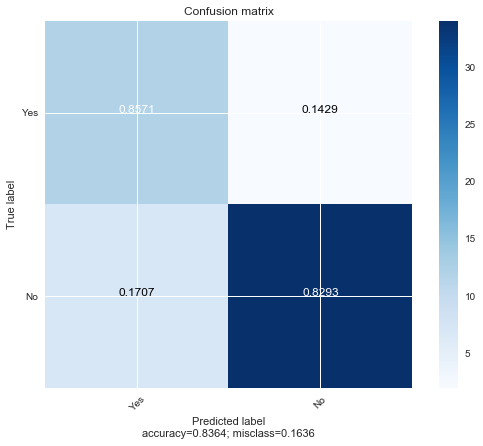

             precision    recall  f1-score   support

          0       0.63      0.86      0.73        14
          1       0.94      0.83      0.88        41

avg / total       0.86      0.84      0.84        55



,Model_Performance_All
Accuracy,0.836364
Recall,0.829268
Precision,0.944444
f1_Score,0.883117


In [44]:
dt_model = DecisionTreeClassifier(criterion = 'entropy' )
dt_model.fit(X_train, Y_train)

Parkinsons_Tree_File = open('Parkinsons.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Parkinsons_Tree_File, feature_names = list(X_train), class_names = list(target_names))
Parkinsons_Tree_File.close()

print (pandas.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))
Y_predict = dt_model.predict(X_test)

dt_model_all = plot_confusion_matrix(Y_test,Y_predict, target_names,title='Confusion matrix',cmap=None,normalize=True)
dt_model_all = dt_model_all.rename(columns={"Model_Performance" : "Model_Performance_All" })
dt_model_all

                   Imp
MDVP:Fo(Hz)   0.348189
MDVP:Fhi(Hz)  0.163497
MDVP:Flo(Hz)  0.110305
RPDE          0.090995
spread2       0.096606
D2            0.190408


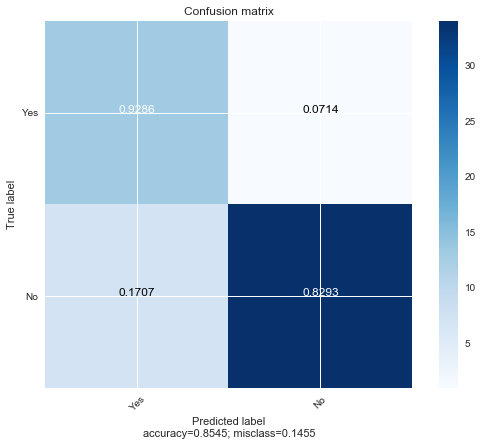

             precision    recall  f1-score   support

          0       0.65      0.93      0.76        14
          1       0.97      0.83      0.89        41

avg / total       0.89      0.85      0.86        55



,Model_Performance_Predictor1
Accuracy,0.854545
Recall,0.829268
Precision,0.971429
f1_Score,0.894737


In [45]:
dt_model_Predictors1 = DecisionTreeClassifier(criterion = 'entropy' )
dt_model_Predictors1.fit(X_train_Predictors1, Y_train)

Parkinsons_Tree_File = open('Parkinsons_predictor1.dot','w')
dot_data = tree.export_graphviz(dt_model_Predictors1, out_file=Parkinsons_Tree_File, feature_names = list(X_train_Predictors1), class_names = list(target_names))
Parkinsons_Tree_File.close()

print (pandas.DataFrame(dt_model_Predictors1.feature_importances_, columns = ["Imp"], index = X_train_Predictors1.columns))

Y_predict_Predictors1 = dt_model_Predictors1.predict(X_test_Predictors1)

dt_model_Predictors1 = plot_confusion_matrix(Y_test,Y_predict_Predictors1, target_names,title='Confusion matrix',cmap=None,normalize=True)
dt_model_Predictors1 = dt_model_Predictors1.rename(columns={"Model_Performance" : "Model_Performance_Predictor1" })
dt_model_Predictors1

                       Imp
MDVP:Fo(Hz)       0.077445
MDVP:Fhi(Hz)      0.053786
MDVP:Flo(Hz)      0.000000
MDVP:Jitter(Abs)  0.000000
MDVP:PPQ          0.000000
MDVP:APQ          0.090077
Shimmer:DDA       0.158703
NHR               0.045416
HNR               0.000000
RPDE              0.098743
DFA               0.000000
spread2           0.000000
D2                0.055888
PPE               0.419942


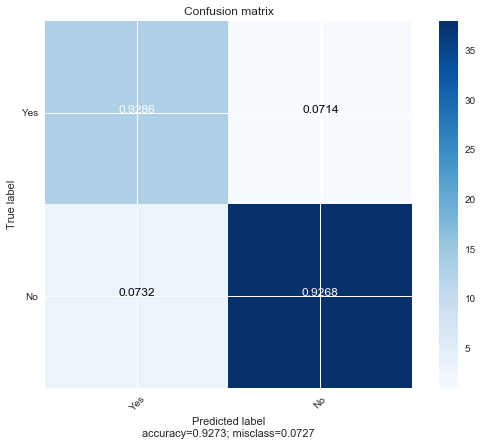

             precision    recall  f1-score   support

          0       0.81      0.93      0.87        14
          1       0.97      0.93      0.95        41

avg / total       0.93      0.93      0.93        55



,Model_Performance_Predictor2
Accuracy,0.927273
Recall,0.926829
Precision,0.974359
f1_Score,0.950000


In [46]:
dt_model_Predictors2 = DecisionTreeClassifier(criterion = 'entropy' )
dt_model_Predictors2.fit(X_train_Predictors2, Y_train)

Parkinsons_Tree_File = open('Parkinsons_predictor2.dot','w')
dot_data = tree.export_graphviz(dt_model_Predictors2, out_file=Parkinsons_Tree_File, feature_names = list(X_train_Predictors2), class_names = list(target_names))
Parkinsons_Tree_File.close()

print (pandas.DataFrame(dt_model_Predictors2.feature_importances_, columns = ["Imp"], index = X_train_Predictors2.columns))

Y_predict_Predictors2 = dt_model_Predictors2.predict(X_test_Predictors2)

dt_model_Predictors2 = plot_confusion_matrix(Y_test,Y_predict_Predictors2, target_names,title='Confusion matrix',cmap=None,normalize=True)
dt_model_Predictors2 = dt_model_Predictors2.rename(columns={"Model_Performance" : "Model_Performance_Predictor2" })
dt_model_Predictors2

                   Imp
MDVP:Fo(Hz)   0.288257
MDVP:Fhi(Hz)  0.144677
MDVP:Flo(Hz)  0.000000
RPDE          0.095457
DFA           0.187764
spread2       0.096606
D2            0.187239


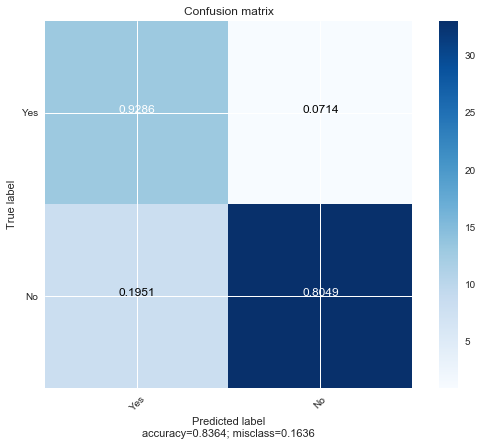

             precision    recall  f1-score   support

          0       0.62      0.93      0.74        14
          1       0.97      0.80      0.88        41

avg / total       0.88      0.84      0.85        55



,Model_Performance_predictorcorr
Accuracy,0.836364
Recall,0.804878
Precision,0.970588
f1_Score,0.880000


In [47]:
dt_model_predictorCorr = DecisionTreeClassifier(criterion = 'entropy' )
dt_model_predictorCorr.fit(X_train_PredictorsCorr, Y_train)

Parkinsons_Tree_File = open('Parkinsons_predictorCorr.dot','w')
dot_data = tree.export_graphviz(dt_model_predictorCorr, out_file=Parkinsons_Tree_File, feature_names = list(X_train_PredictorsCorr), class_names = list(target_names))
Parkinsons_Tree_File.close()

print (pandas.DataFrame(dt_model_predictorCorr.feature_importances_, columns = ["Imp"], index = X_train_PredictorsCorr.columns))

Y_predict_PredictorsCorr = dt_model_predictorCorr.predict(X_test_PredictorsCorr)

dt_model_PredictorsCorr = plot_confusion_matrix(Y_test,Y_predict_PredictorsCorr, target_names,title='Confusion matrix',cmap=None,normalize=True)
dt_model_PredictorsCorr = dt_model_PredictorsCorr.rename(columns={"Model_Performance" : "Model_Performance_predictorcorr" })
dt_model_PredictorsCorr

                       Imp
MDVP:Fo(Hz)       0.077445
MDVP:Fhi(Hz)      0.053786
MDVP:Flo(Hz)      0.045416
MDVP:Jitter(Abs)  0.000000
MDVP:PPQ          0.000000
MDVP:APQ          0.090077
Shimmer:DDA       0.158703
NHR               0.000000
HNR               0.000000
RPDE              0.000000
spread2           0.055888
D2                0.053327
PPE               0.465358


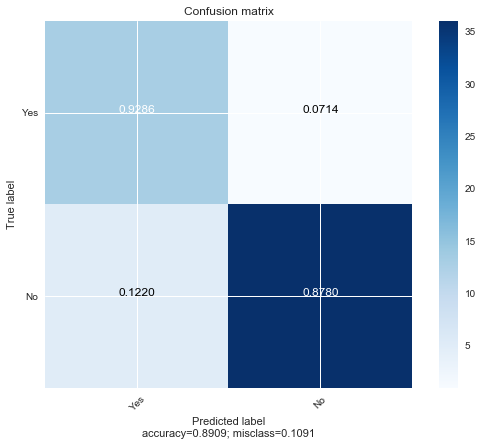

             precision    recall  f1-score   support

          0       0.72      0.93      0.81        14
          1       0.97      0.88      0.92        41

avg / total       0.91      0.89      0.89        55



,Model_Performance_VIF
Accuracy,0.890909
Recall,0.878049
Precision,0.972973
f1_Score,0.923077


In [48]:
dt_model_predictorVIF = DecisionTreeClassifier(criterion = 'entropy' )
dt_model_predictorVIF.fit(X_train_PredictorsVIF, Y_train)

Parkinsons_Tree_File = open('Parkinsons_predictorVIF.dot','w')
dot_data = tree.export_graphviz(dt_model_predictorVIF, out_file=Parkinsons_Tree_File, feature_names = list(X_train_PredictorsVIF), class_names = list(target_names))
Parkinsons_Tree_File.close()

print (pandas.DataFrame(dt_model_predictorVIF.feature_importances_, columns = ["Imp"], index = X_train_PredictorsVIF.columns))

Y_predict_PredictorsVIF = dt_model_predictorVIF.predict(X_test_PredictorsVIF)

dt_model_PredictorsVIF = plot_confusion_matrix(Y_test,Y_predict_PredictorsVIF, target_names,title='Confusion matrix',cmap=None,normalize=True)
dt_model_PredictorsVIF = dt_model_PredictorsVIF.rename(columns={"Model_Performance" : "Model_Performance_VIF" })
dt_model_PredictorsVIF

In [49]:
Compare_Model = pandas.concat([dt_model_all,dt_model_Predictors1,dt_model_Predictors2,
                               dt_model_PredictorsCorr, dt_model_PredictorsVIF], axis = 1)

In [50]:
Compare_Model

,Model_Performance_All,Model_Performance_Predictor1,Model_Performance_Predictor2,Model_Performance_predictorcorr,Model_Performance_VIF
Accuracy,0.836364,0.854545,0.927273,0.836364,0.890909
Recall,0.829268,0.829268,0.926829,0.804878,0.878049
Precision,0.944444,0.971429,0.974359,0.970588,0.972973
f1_Score,0.883117,0.894737,0.950000,0.880000,0.923077


# Regularization of models

In [51]:
RandomState = numpy.random.seed(1234)
Test_reg_scores = []
max_depth = []
max_leaf_nodes = []
for i in range(1,20,5):
    for j in range(2,20,2):
        Test_reg_param = DecisionTreeClassifier(criterion = 'entropy', max_depth = i, max_leaf_nodes = j, random_state=RandomState )
        Test_reg_param.fit(X_train, Y_train)
        Y_predict_Test_reg = Test_reg_param.predict(X_test)
        scores = Test_reg_param.score(X_test, Y_test)
        Test_reg_scores.append(scores)
        max_depth.append(i)
        max_leaf_nodes.append(j)

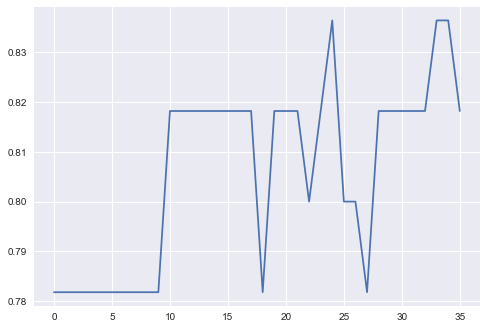

In [52]:
matplot.plot(Test_reg_scores)

In [53]:
pandas.concat([pandas.DataFrame(Test_reg_scores, columns = ['Scores']),
               pandas.DataFrame(max_depth, columns = ['max_depth']),
               pandas.DataFrame(max_leaf_nodes, columns = ['max_leaf_nodes'])], axis = 1)

,Scores,max_depth,max_leaf_nodes
0,0.781818,1,2
1,0.781818,1,4
2,0.781818,1,6
3,0.781818,1,8
4,0.781818,1,10
5,0.781818,1,12
6,0.781818,1,14
7,0.781818,1,16
8,0.781818,1,18
9,0.781818,6,2


                       Imp
MDVP:Fo(Hz)       0.089238
MDVP:Fhi(Hz)      0.000000
MDVP:Flo(Hz)      0.000000
MDVP:Jitter(%)    0.000000
MDVP:Jitter(Abs)  0.000000
MDVP:RAP          0.000000
MDVP:PPQ          0.000000
Jitter:DDP        0.060716
MDVP:Shimmer      0.000000
MDVP:Shimmer(dB)  0.000000
Shimmer:APQ3      0.092910
Shimmer:APQ5      0.207018
MDVP:APQ          0.000000
Shimmer:DDA       0.000000
NHR               0.000000
HNR               0.000000
RPDE              0.000000
DFA               0.064518
spread1           0.000000
spread2           0.000000
D2                0.065658
PPE               0.419942


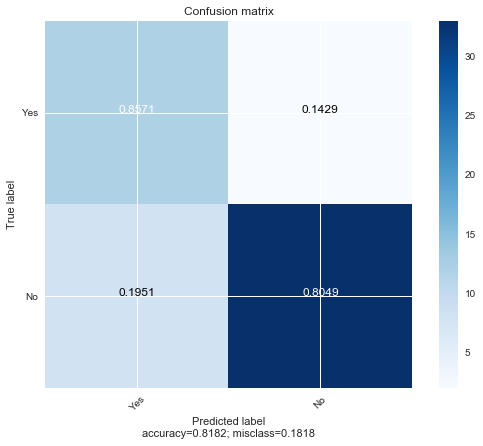

             precision    recall  f1-score   support

          0       0.60      0.86      0.71        14
          1       0.94      0.80      0.87        41

avg / total       0.86      0.82      0.83        55



,Model_Performance_All
Accuracy,0.818182
Recall,0.804878
Precision,0.942857
f1_Score,0.868421


In [54]:
dt_model_reg = DecisionTreeClassifier(criterion = 'entropy', max_depth = 11, max_leaf_nodes = 14, random_state= RandomState )
dt_model_reg.fit(X_train, Y_train)

Parkinsons_Tree_File = open('Parkinsons_reg.dot','w')
dot_data = tree.export_graphviz(dt_model_reg, out_file=Parkinsons_Tree_File, feature_names = list(X_train), class_names = list(target_names))
Parkinsons_Tree_File.close()

print (pandas.DataFrame(dt_model_reg.feature_importances_, columns = ["Imp"], index = X_train.columns))
Y_predict_reg = dt_model_reg.predict(X_test)

dt_model_reg_all = plot_confusion_matrix(Y_test,Y_predict_reg, target_names,title='Confusion matrix',cmap=None,normalize=True)
dt_model_reg_all = dt_model_reg_all.rename(columns={"Model_Performance" : "Model_Performance_All" })
dt_model_reg_all

,Scores,max_depth,max_leaf_nodes
0,0.854545,1,2
1,0.854545,1,4
2,0.854545,1,6
3,0.854545,1,8
4,0.854545,1,10
5,0.854545,1,12
6,0.854545,1,14
7,0.854545,1,16
8,0.854545,1,18
9,0.854545,6,2


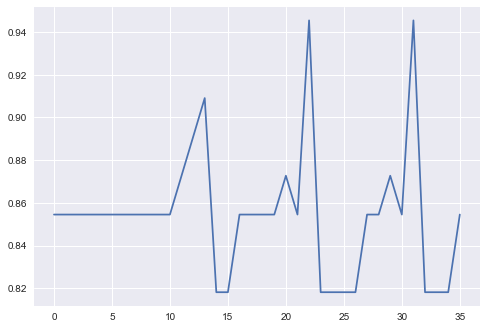

In [55]:
Test_reg_scores = []
max_depth = []
max_leaf_nodes = []
for i in range(1,20,5):
    for j in range(2,20,2):
        Test_reg_param = DecisionTreeClassifier(criterion = 'entropy', max_depth = i, max_leaf_nodes = j, random_state= RandomState )
        Test_reg_param.fit(X_train_Predictors1, Y_train)
        Y_predict_Test_reg = Test_reg_param.predict(X_test_Predictors1)
        scores = Test_reg_param.score(X_test_Predictors1, Y_test)
        Test_reg_scores.append(scores)
        max_depth.append(i)
        max_leaf_nodes.append(j)
        
matplot.plot(Test_reg_scores)

pandas.concat([pandas.DataFrame(Test_reg_scores, columns = ['Scores']),
               pandas.DataFrame(max_depth, columns = ['max_depth']),
               pandas.DataFrame(max_leaf_nodes, columns = ['max_leaf_nodes'])], axis = 1)

                   Imp
MDVP:Fo(Hz)   0.540708
MDVP:Fhi(Hz)  0.000000
MDVP:Flo(Hz)  0.071226
RPDE          0.046328
spread2       0.115026
D2            0.226713


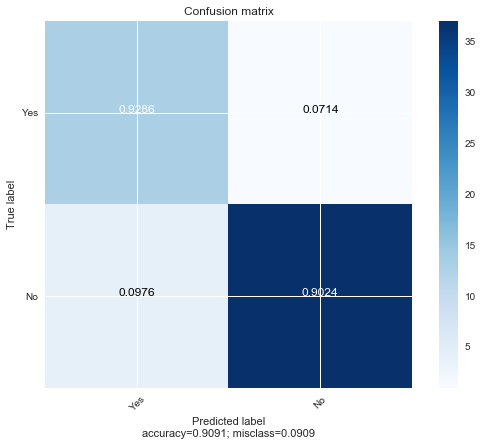

             precision    recall  f1-score   support

          0       0.76      0.93      0.84        14
          1       0.97      0.90      0.94        41

avg / total       0.92      0.91      0.91        55



,Model_Performance_reg_Predictor1
Accuracy,0.909091
Recall,0.902439
Precision,0.973684
f1_Score,0.936709


In [56]:
dt_model_reg_Predictors1 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 6, max_leaf_nodes = 10, random_state= RandomState)
dt_model_reg_Predictors1.fit(X_train_Predictors1, Y_train)

Parkinsons_Tree_File = open('Parkinsons_reg_predictor1.dot','w')
dot_data = tree.export_graphviz(dt_model_reg_Predictors1, out_file=Parkinsons_Tree_File, feature_names = list(X_train_Predictors1), class_names = list(target_names))
Parkinsons_Tree_File.close()

print (pandas.DataFrame(dt_model_reg_Predictors1.feature_importances_, columns = ["Imp"], index = X_train_Predictors1.columns))

Y_predict_reg_Predictors1 = dt_model_reg_Predictors1.predict(X_test_Predictors1)

dt_model_reg_Predictors1 = plot_confusion_matrix(Y_test,Y_predict_reg_Predictors1, target_names,title='Confusion matrix',cmap=None,normalize=True)
dt_model_reg_Predictors1 = dt_model_reg_Predictors1.rename(columns={"Model_Performance" : "Model_Performance_reg_Predictor1" })
dt_model_reg_Predictors1

,Scores,max_depth,max_leaf_nodes
0,0.781818,1,2
1,0.781818,1,4
2,0.781818,1,6
3,0.781818,1,8
4,0.781818,1,10
5,0.781818,1,12
6,0.781818,1,14
7,0.781818,1,16
8,0.781818,1,18
9,0.781818,6,2


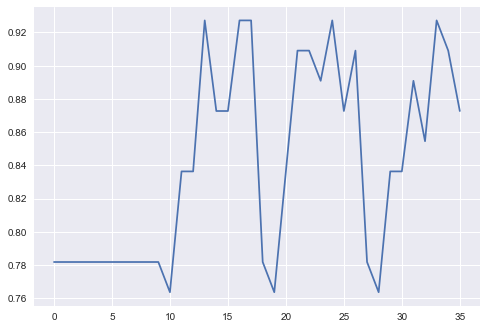

In [57]:
Test_reg_scores = []
max_depth = []
max_leaf_nodes = []
for i in range(1,20,5):
    for j in range(2,20,2):
        Test_reg_param = DecisionTreeClassifier(criterion = 'entropy', max_depth = i, max_leaf_nodes = j, random_state= RandomState )
        Test_reg_param.fit(X_train_Predictors2, Y_train)
        Y_predict_Test_reg = Test_reg_param.predict(X_test_Predictors2)
        scores = Test_reg_param.score(X_test_Predictors2, Y_test)
        Test_reg_scores.append(scores)
        max_depth.append(i)
        max_leaf_nodes.append(j)
        
matplot.plot(Test_reg_scores)

pandas.concat([pandas.DataFrame(Test_reg_scores, columns = ['Scores']),
               pandas.DataFrame(max_depth, columns = ['max_depth']),
               pandas.DataFrame(max_leaf_nodes, columns = ['max_leaf_nodes'])], axis = 1)

                       Imp
MDVP:Fo(Hz)       0.081129
MDVP:Fhi(Hz)      0.056345
MDVP:Flo(Hz)      0.047577
MDVP:Jitter(Abs)  0.000000
MDVP:PPQ          0.000000
MDVP:APQ          0.094362
Shimmer:DDA       0.166253
NHR               0.000000
HNR               0.000000
RPDE              0.055864
DFA               0.000000
spread2           0.000000
D2                0.058547
PPE               0.439922


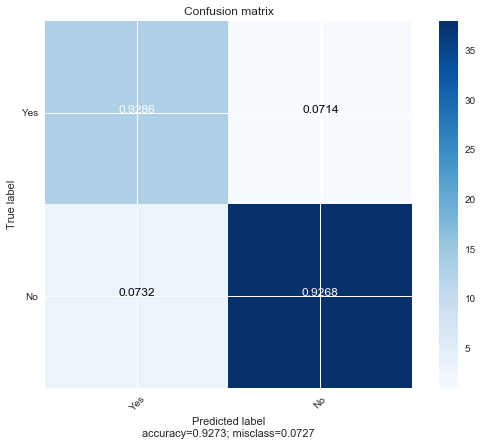

             precision    recall  f1-score   support

          0       0.81      0.93      0.87        14
          1       0.97      0.93      0.95        41

avg / total       0.93      0.93      0.93        55



,Model_Performance_reg_redictor2
Accuracy,0.927273
Recall,0.926829
Precision,0.974359
f1_Score,0.950000


In [58]:
dt_model_reg_Predictors2 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 6, max_leaf_nodes = 10 , random_state= RandomState )
dt_model_reg_Predictors2.fit(X_train_Predictors2, Y_train)

Parkinsons_Tree_File = open('Parkinsons_reg_predictor2.dot','w')
dot_data = tree.export_graphviz(dt_model_reg_Predictors2, out_file=Parkinsons_Tree_File, feature_names = list(X_train_Predictors2), class_names = list(target_names))
Parkinsons_Tree_File.close()

print (pandas.DataFrame(dt_model_reg_Predictors2.feature_importances_, columns = ["Imp"], index = X_train_Predictors2.columns))

Y_predict_reg_Predictors2 = dt_model_reg_Predictors2.predict(X_test_Predictors2)

dt_model_reg_Predictors2 = plot_confusion_matrix(Y_test,Y_predict_reg_Predictors2, target_names,title='Confusion matrix',cmap=None,normalize=True)
dt_model_reg_Predictors2 = dt_model_reg_Predictors2.rename(columns={"Model_Performance" : "Model_Performance_reg_redictor2" })
dt_model_reg_Predictors2

,Scores,max_depth,max_leaf_nodes
0,0.854545,1,2
1,0.854545,1,4
2,0.854545,1,6
3,0.854545,1,8
4,0.854545,1,10
5,0.854545,1,12
6,0.854545,1,14
7,0.854545,1,16
8,0.854545,1,18
9,0.854545,6,2


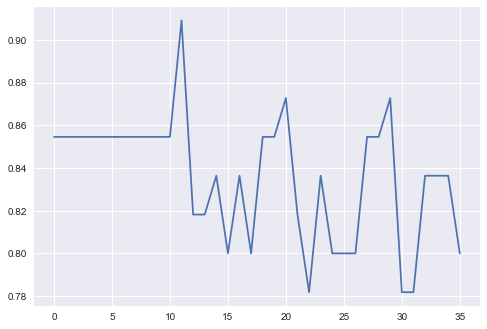

In [59]:
Test_reg_scores = []
max_depth = []
max_leaf_nodes = []
for i in range(1,20,5):
    for j in range(2,20,2):
        Test_reg_param = DecisionTreeClassifier(criterion = 'entropy', max_depth = i, max_leaf_nodes = j, random_state= RandomState )
        Test_reg_param.fit(X_train_PredictorsCorr, Y_train)
        Y_predict_Test_reg = Test_reg_param.predict(X_test_PredictorsCorr)
        scores = Test_reg_param.score(X_test_PredictorsCorr, Y_test)
        Test_reg_scores.append(scores)
        max_depth.append(i)
        max_leaf_nodes.append(j)
        
matplot.plot(Test_reg_scores)

pandas.concat([pandas.DataFrame(Test_reg_scores, columns = ['Scores']),
               pandas.DataFrame(max_depth, columns = ['max_depth']),
               pandas.DataFrame(max_leaf_nodes, columns = ['max_leaf_nodes'])], axis = 1)

                   Imp
MDVP:Fo(Hz)   0.399628
MDVP:Fhi(Hz)  0.224183
MDVP:Flo(Hz)  0.000000
RPDE          0.000000
DFA           0.000000
spread2       0.149695
D2            0.226493


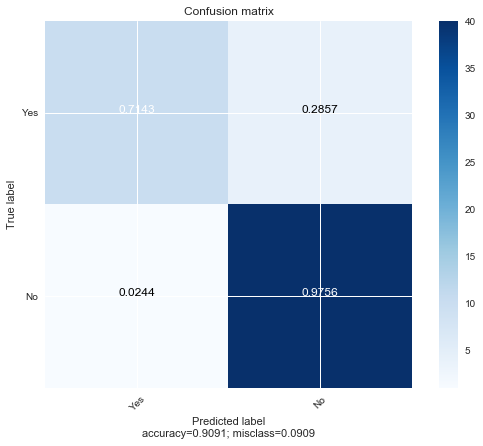

             precision    recall  f1-score   support

          0       0.91      0.71      0.80        14
          1       0.91      0.98      0.94        41

avg / total       0.91      0.91      0.91        55



,Model_Performance_reg_predictorcorr
Accuracy,0.909091
Recall,0.975610
Precision,0.909091
f1_Score,0.941176


In [60]:
dt_model_reg_predictorCorr = DecisionTreeClassifier(criterion = 'entropy' ,max_depth = 16, max_leaf_nodes = 6, random_state= RandomState)
dt_model_reg_predictorCorr.fit(X_train_PredictorsCorr, Y_train)

Parkinsons_Tree_File = open('Parkinsons_reg_predictorCorr.dot','w')
dot_data = tree.export_graphviz(dt_model_reg_predictorCorr, out_file=Parkinsons_Tree_File, feature_names = list(X_train_PredictorsCorr), class_names = list(target_names))
Parkinsons_Tree_File.close()

print (pandas.DataFrame(dt_model_reg_predictorCorr.feature_importances_, columns = ["Imp"], index = X_train_PredictorsCorr.columns))

Y_predict_reg_PredictorsCorr = dt_model_reg_predictorCorr.predict(X_test_PredictorsCorr)

dt_model_reg_PredictorsCorr = plot_confusion_matrix(Y_test,Y_predict_reg_PredictorsCorr, target_names,title='Confusion matrix',cmap=None,normalize=True)
dt_model_reg_PredictorsCorr = dt_model_reg_PredictorsCorr.rename(columns={"Model_Performance" : "Model_Performance_reg_predictorcorr" })
dt_model_reg_PredictorsCorr

,Scores,max_depth,max_leaf_nodes
0,0.781818,1,2
1,0.781818,1,4
2,0.781818,1,6
3,0.781818,1,8
4,0.781818,1,10
5,0.781818,1,12
6,0.781818,1,14
7,0.781818,1,16
8,0.781818,1,18
9,0.781818,6,2


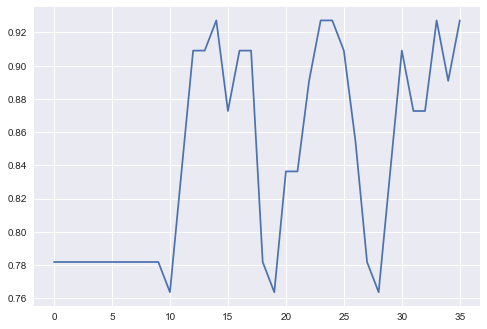

In [61]:
Test_reg_scores = []
max_depth = []
max_leaf_nodes = []
for i in range(1,20,5):
    for j in range(2,20,2):
        Test_reg_param = DecisionTreeClassifier(criterion = 'entropy', max_depth = i, max_leaf_nodes = j, random_state= RandomState )
        Test_reg_param.fit(X_train_PredictorsVIF, Y_train)
        Y_predict_Test_reg = Test_reg_param.predict(X_test_PredictorsVIF)
        scores = Test_reg_param.score(X_test_PredictorsVIF, Y_test)
        Test_reg_scores.append(scores)
        max_depth.append(i)
        max_leaf_nodes.append(j)
        
matplot.plot(Test_reg_scores)

pandas.concat([pandas.DataFrame(Test_reg_scores, columns = ['Scores']),
               pandas.DataFrame(max_depth, columns = ['max_depth']),
               pandas.DataFrame(max_leaf_nodes, columns = ['max_leaf_nodes'])], axis = 1)

                       Imp
MDVP:Fo(Hz)       0.077445
MDVP:Fhi(Hz)      0.053786
MDVP:Flo(Hz)      0.000000
MDVP:Jitter(Abs)  0.000000
MDVP:PPQ          0.000000
MDVP:APQ          0.090077
Shimmer:DDA       0.158703
NHR               0.090832
HNR               0.000000
RPDE              0.053327
spread2           0.000000
D2                0.055888
PPE               0.419942


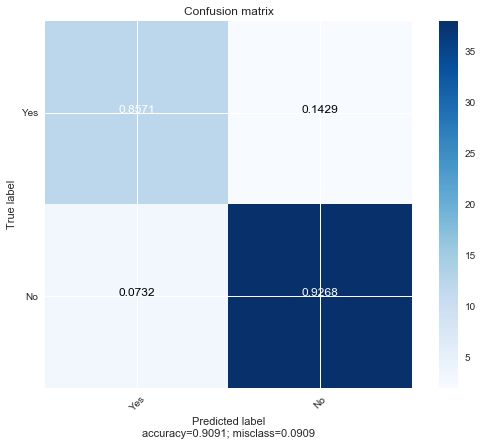

             precision    recall  f1-score   support

          0       0.80      0.86      0.83        14
          1       0.95      0.93      0.94        41

avg / total       0.91      0.91      0.91        55



,Model_Performance_reg_VIF
Accuracy,0.909091
Recall,0.926829
Precision,0.950000
f1_Score,0.938272


In [62]:
dt_model_reg_predictorVIF = DecisionTreeClassifier(criterion = 'entropy', max_depth = 6, max_leaf_nodes = 14, random_state= RandomState)
dt_model_reg_predictorVIF.fit(X_train_PredictorsVIF, Y_train)

Parkinsons_Tree_File = open('Parkinsons_reg_predictorVIF.dot','w')
dot_data = tree.export_graphviz(dt_model_reg_predictorVIF, out_file=Parkinsons_Tree_File, feature_names = list(X_train_PredictorsVIF), class_names = list(target_names))
Parkinsons_Tree_File.close()

print (pandas.DataFrame(dt_model_reg_predictorVIF.feature_importances_, columns = ["Imp"], index = X_train_PredictorsVIF.columns))

Y_predict_reg_PredictorsVIF = dt_model_reg_predictorVIF.predict(X_test_PredictorsVIF)

dt_model_reg_PredictorsVIF = plot_confusion_matrix(Y_test,Y_predict_reg_PredictorsVIF, target_names,title='Confusion matrix',cmap=None,normalize=True)
dt_model_reg_PredictorsVIF = dt_model_reg_PredictorsVIF.rename(columns={"Model_Performance" : "Model_Performance_reg_VIF" })
dt_model_reg_PredictorsVIF

In [63]:
Compare_Model_reg = pandas.concat([dt_model_reg_all,dt_model_reg_Predictors1,dt_model_reg_Predictors2,
                               dt_model_reg_PredictorsCorr, dt_model_reg_PredictorsVIF], axis = 1)

In [64]:
((Compare_Model_reg.T).reset_index()).iloc[:,1:5] - ((Compare_Model.T).reset_index()).iloc[:,1:5]

,Accuracy,Recall,Precision,f1_Score
0,-0.018182,-0.024390,-0.001587,-0.014696
1,0.054545,0.073171,0.002256,0.041972
2,0.000000,0.000000,0.000000,0.000000
3,0.072727,0.170732,-0.061497,0.061176
4,0.018182,0.048780,-0.022973,0.015195


In [65]:
Compare_Model.T

,Accuracy,Recall,Precision,f1_Score
Model_Performance_All,0.836364,0.829268,0.944444,0.883117
Model_Performance_Predictor1,0.854545,0.829268,0.971429,0.894737
Model_Performance_Predictor2,0.927273,0.926829,0.974359,0.950000
Model_Performance_predictorcorr,0.836364,0.804878,0.970588,0.880000
Model_Performance_VIF,0.890909,0.878049,0.972973,0.923077


In [66]:
Compare_Model_reg.T

,Accuracy,Recall,Precision,f1_Score
Model_Performance_All,0.818182,0.804878,0.942857,0.868421
Model_Performance_reg_Predictor1,0.909091,0.902439,0.973684,0.936709
Model_Performance_reg_redictor2,0.927273,0.926829,0.974359,0.950000
Model_Performance_reg_predictorcorr,0.909091,0.975610,0.909091,0.941176
Model_Performance_reg_VIF,0.909091,0.926829,0.950000,0.938272


Inference and conlcusion:
    
Regularising the decision trees helped in improving the metrics as seen in the results below


    Accuracy	 Recall	   Precision   f1_Score
    0.018182	0.024390	0.001587	0.014696  
    0.127273	0.170732	0.005303	0.098098
    0.000000	0.000000	0.000000	0.000000
    0.109091	0.219512   -0.059659	0.091861
    0.036364	0.048780	0.001386	0.026923


Based on the results Decision Tree with below variables are giving the best results across metics

Xs - Predictor1 =  ['D2', 'MDVP:Fo(Hz)', 'MDVP:Flo(Hz)', 'RPDE', 'MDVP:Fhi(Hz)', 'spread2'] 

Model selected = "Model_Performance_reg_Predictor1" with accuracy 94.54, Precision - 97.50, Recall - 95.12

Optimum number - Max depth = 6 ; Max leaf nodes = 10

# Model using Random forest



,Scores,n_estimators
0,0.890909,50
1,0.854545,75
2,0.818182,100
3,0.854545,125
4,0.836364,150
5,0.872727,175
6,0.854545,200
7,0.854545,225
8,0.854545,250
9,0.854545,275


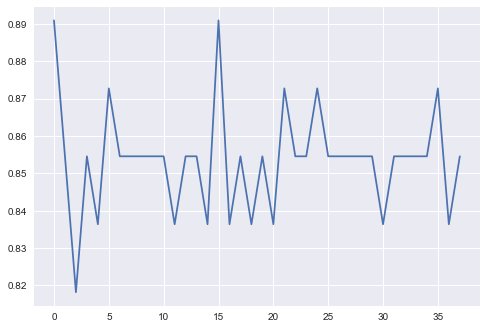

In [67]:
Test_reg_scores = []
n_estimators = []
for i in range(50,1000,25):
    Test_rfcl = RandomForestClassifier(n_estimators = i, random_state=RandomState)
    Test_rfcl = Test_rfcl.fit(X_train, Y_train)
    Test_Y_predict_rfcl = Test_rfcl.predict(X_test)
    scores = Test_rfcl.score(X_test, Y_test)
    Test_reg_scores.append(scores)
    n_estimators.append(i)
            
matplot.plot(Test_reg_scores)

pandas.concat([pandas.DataFrame(Test_reg_scores, columns = ['Scores']),
               pandas.DataFrame(n_estimators, columns = ['n_estimators'])], axis = 1)

1.0
0.8545454545454545


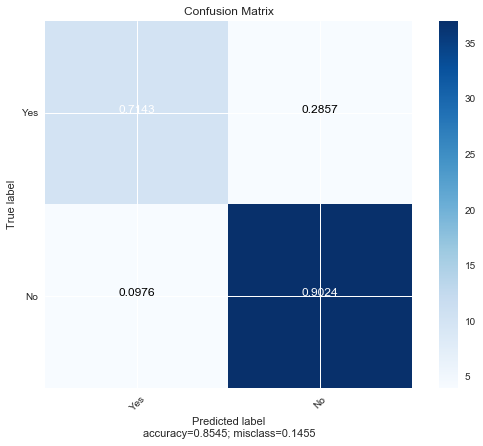

             precision    recall  f1-score   support

          0       0.71      0.71      0.71        14
          1       0.90      0.90      0.90        41

avg / total       0.85      0.85      0.85        55



,Model_Performance_rfcl_All
Accuracy,0.854545
Recall,0.902439
Precision,0.902439
f1_Score,0.902439


In [68]:
rfcl = RandomForestClassifier(n_estimators = 325 , random_state=RandomState)
rfcl = rfcl.fit(X_train, Y_train)
Y_predict_rfcl = rfcl.predict(X_test)
print(rfcl.score(X_train , Y_train))
print(rfcl.score(X_test, Y_test))
rfcl_All = plot_confusion_matrix(Y_test, Y_predict_rfcl, target_names,title = "Confusion Matrix", cmap = None, normalize= True)
rfcl_All = rfcl_All.rename(columns={"Model_Performance" : "Model_Performance_rfcl_All" })
rfcl_All

,Scores,n_estimators
0,0.963636,50
1,0.927273,75
2,0.945455,100
3,0.945455,125
4,0.945455,150
5,0.927273,175
6,0.963636,200
7,0.945455,225
8,0.945455,250
9,0.945455,275


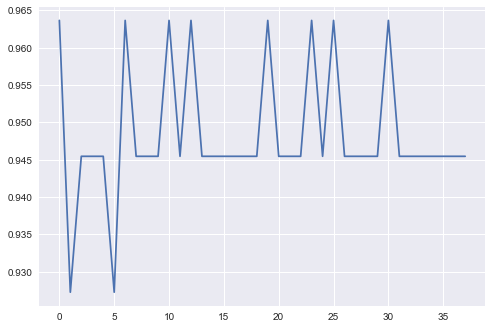

In [69]:
Test_reg_scores = []
n_estimators = []
for i in range(50,1000,25):
    Test_rfcl = RandomForestClassifier(n_estimators = i, random_state=RandomState)
    Test_rfcl = Test_rfcl.fit(X_train_Predictors1, Y_train)
    Test_Y_predict_rfcl = Test_rfcl.predict(X_test_Predictors1)
    scores = Test_rfcl.score(X_test_Predictors1, Y_test)
    Test_reg_scores.append(scores)
    n_estimators.append(i)
            
matplot.plot(Test_reg_scores)

pandas.concat([pandas.DataFrame(Test_reg_scores, columns = ['Scores']),
               pandas.DataFrame(n_estimators, columns = ['n_estimators'])], axis = 1)

1.0
0.9454545454545454


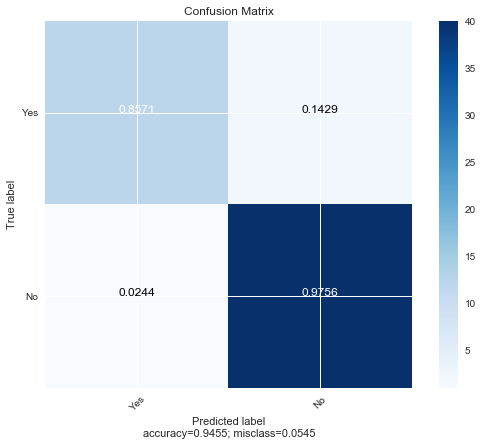

             precision    recall  f1-score   support

          0       0.92      0.86      0.89        14
          1       0.95      0.98      0.96        41

avg / total       0.94      0.95      0.94        55



,Model_Performance_Predictors1
Accuracy,0.945455
Recall,0.975610
Precision,0.952381
f1_Score,0.963855


In [70]:
rfcl_predictors1 = RandomForestClassifier(n_estimators = 300, random_state=RandomState)
rfcl_predictors1 = rfcl.fit(X_train_Predictors1, Y_train)
Y_predict_rfcl_predictors1 = rfcl.predict(X_test_Predictors1)
print(rfcl.score(X_train_Predictors1 , Y_train))
print(rfcl.score(X_test_Predictors1, Y_test))
rfcl_Predictors1 = plot_confusion_matrix(Y_test, Y_predict_rfcl_predictors1, target_names,title = "Confusion Matrix", cmap = None, normalize= True)
rfcl_Predictors1 = rfcl_Predictors1.rename(columns={"Model_Performance" : "Model_Performance_Predictors1" })
rfcl_Predictors1

,Scores,n_estimators
0,0.890909,50
1,0.890909,75
2,0.872727,100
3,0.890909,125
4,0.872727,150
5,0.890909,175
6,0.890909,200
7,0.890909,225
8,0.909091,250
9,0.872727,275


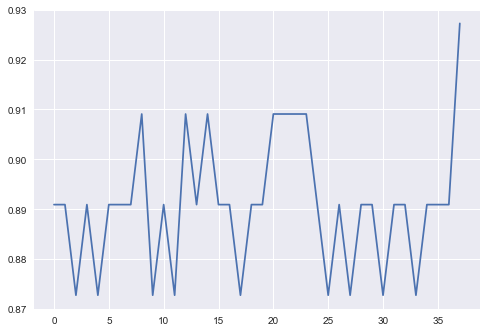

In [71]:
Test_reg_scores = []
n_estimators = []
for i in range(50,1000,25):
    Test_rfcl = RandomForestClassifier(n_estimators = i, random_state=RandomState)
    Test_rfcl = Test_rfcl.fit(X_train_Predictors2, Y_train)
    Test_Y_predict_rfcl = Test_rfcl.predict(X_test_Predictors2)
    scores = Test_rfcl.score(X_test_Predictors2, Y_test)
    Test_reg_scores.append(scores)
    n_estimators.append(i)
            
matplot.plot(Test_reg_scores)

pandas.concat([pandas.DataFrame(Test_reg_scores, columns = ['Scores']),
               pandas.DataFrame(n_estimators, columns = ['n_estimators'])], axis = 1)

1.0
0.8909090909090909


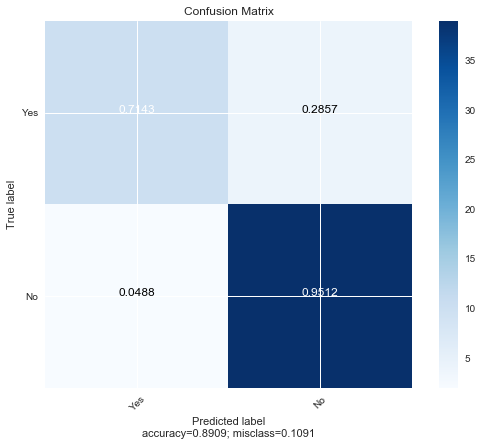

             precision    recall  f1-score   support

          0       0.83      0.71      0.77        14
          1       0.91      0.95      0.93        41

avg / total       0.89      0.89      0.89        55



,Model_Performance_Predictors2
Accuracy,0.890909
Recall,0.951220
Precision,0.906977
f1_Score,0.928571


In [72]:
rfcl_predictors2 = RandomForestClassifier(n_estimators = 175)
rfcl_predictors2 = rfcl.fit(X_train_Predictors2, Y_train)
Y_predict_rfcl_predictors2 = rfcl.predict(X_test_Predictors2)
print(rfcl.score(X_train_Predictors2 , Y_train))
print(rfcl.score(X_test_Predictors2, Y_test))
rfcl_Predictors2 = plot_confusion_matrix(Y_test, Y_predict_rfcl_predictors2, target_names,title = "Confusion Matrix", cmap = None, normalize= True)
rfcl_Predictors2 = rfcl_Predictors2.rename(columns={"Model_Performance" : "Model_Performance_Predictors2" })
rfcl_Predictors2

,Scores,n_estimators
0,0.981818,50
1,0.981818,75
2,0.963636,100
3,0.963636,125
4,0.981818,150
5,0.981818,175
6,0.963636,200
7,0.981818,225
8,0.963636,250
9,0.963636,275


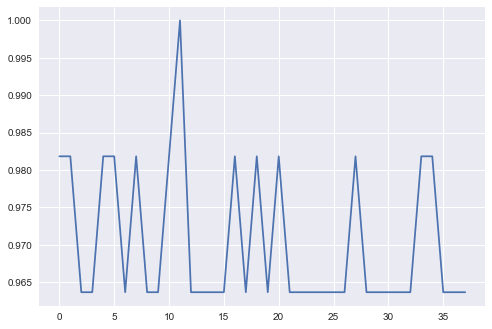

In [73]:
Test_reg_scores = []
n_estimators = []
for i in range(50,1000,25):
    Test_rfcl = RandomForestClassifier(n_estimators = i, random_state=RandomState)
    Test_rfcl = Test_rfcl.fit(X_train_PredictorsCorr, Y_train)
    Test_Y_predict_rfcl = Test_rfcl.predict(X_test_PredictorsCorr)
    scores = Test_rfcl.score(X_test_PredictorsCorr, Y_test)
    Test_reg_scores.append(scores)
    n_estimators.append(i)
            
matplot.plot(Test_reg_scores)

pandas.concat([pandas.DataFrame(Test_reg_scores, columns = ['Scores']),
               pandas.DataFrame(n_estimators, columns = ['n_estimators'])], axis = 1)

1.0
1.0


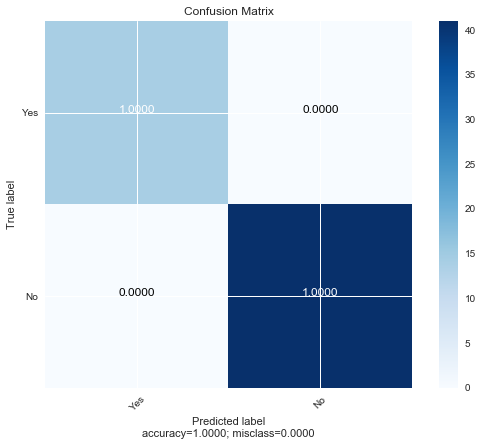

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        14
          1       1.00      1.00      1.00        41

avg / total       1.00      1.00      1.00        55



,Model_Performance_PredictorsCorr
Accuracy,1.0
Recall,1.0
Precision,1.0
f1_Score,1.0


In [74]:
rfcl_PredictorCorr = RandomForestClassifier(n_estimators = 250)
rfcl_PredictorCorr = rfcl.fit(X_train_PredictorsCorr, Y_train)
Y_predict_rfcl_PredictorCorr = rfcl.predict(X_test_PredictorsCorr)
print(rfcl.score(X_train_PredictorsCorr , Y_train))
print(rfcl.score(X_test_PredictorsCorr, Y_test))
rfcl_predictorsCorr = plot_confusion_matrix(Y_test, Y_predict_rfcl_PredictorCorr, target_names,title = "Confusion Matrix", cmap = None, normalize= True)
rfcl_predictorsCorr = rfcl_predictorsCorr.rename(columns={"Model_Performance" : "Model_Performance_PredictorsCorr" })
rfcl_predictorsCorr

,Scores,n_estimators
0,0.890909,50
1,0.890909,75
2,0.909091,100
3,0.890909,125
4,0.872727,150
5,0.890909,175
6,0.872727,200
7,0.872727,225
8,0.872727,250
9,0.872727,275


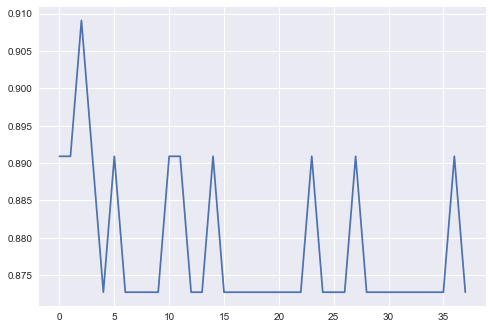

In [75]:
Test_reg_scores = []
n_estimators = []
for i in range(50,1000,25):
    Test_rfcl = RandomForestClassifier(n_estimators = i, random_state=RandomState)
    Test_rfcl = Test_rfcl.fit(X_train_PredictorsVIF, Y_train)
    Test_Y_predict_rfcl = Test_rfcl.predict(X_test_PredictorsVIF)
    scores = Test_rfcl.score(X_test_PredictorsVIF, Y_test)
    Test_reg_scores.append(scores)
    n_estimators.append(i)
            
matplot.plot(Test_reg_scores)

pandas.concat([pandas.DataFrame(Test_reg_scores, columns = ['Scores']),
               pandas.DataFrame(n_estimators, columns = ['n_estimators'])], axis = 1)

1.0
0.8727272727272727


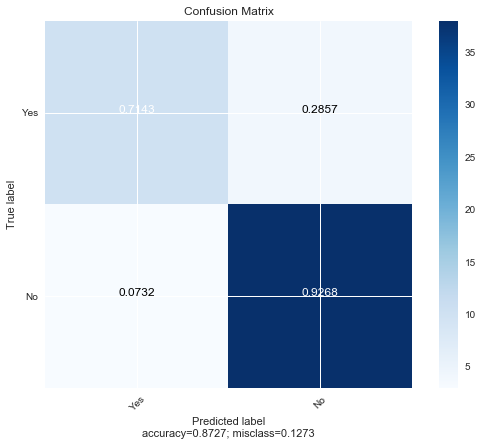

             precision    recall  f1-score   support

          0       0.77      0.71      0.74        14
          1       0.90      0.93      0.92        41

avg / total       0.87      0.87      0.87        55



,Model_Performance_PredictorsVIF
Accuracy,0.872727
Recall,0.926829
Precision,0.904762
f1_Score,0.915663


In [76]:
rfcl_PredictorVIF = RandomForestClassifier(n_estimators = 175)
rfcl_PredictorVIF = rfcl.fit(X_train_PredictorsVIF, Y_train)
Y_predict_rfcl_PredictorVIF = rfcl.predict(X_test_PredictorsVIF)
print(rfcl.score(X_train_PredictorsVIF , Y_train))
print(rfcl.score(X_test_PredictorsVIF, Y_test))
rfcl_predictorsVIF = plot_confusion_matrix(Y_test, Y_predict_rfcl_PredictorVIF, target_names,title = "Confusion Matrix", cmap = None, normalize= True)
rfcl_predictorsVIF = rfcl_predictorsVIF.rename(columns={"Model_Performance" : "Model_Performance_PredictorsVIF" })
rfcl_predictorsVIF

In [77]:
Compare_Model_rfcl = pandas.concat([rfcl_All, rfcl_Predictors1, rfcl_Predictors2, 
                                    rfcl_predictorsCorr, rfcl_predictorsVIF], axis = 1)

In [78]:
Compare_Model_rfcl.T

,Accuracy,Recall,Precision,f1_Score
Model_Performance_rfcl_All,0.854545,0.902439,0.902439,0.902439
Model_Performance_Predictors1,0.945455,0.975610,0.952381,0.963855
Model_Performance_Predictors2,0.890909,0.951220,0.906977,0.928571
Model_Performance_PredictorsCorr,1.000000,1.000000,1.000000,1.000000
Model_Performance_PredictorsVIF,0.872727,0.926829,0.904762,0.915663


In [79]:
Compare_Model_reg.T

,Accuracy,Recall,Precision,f1_Score
Model_Performance_All,0.818182,0.804878,0.942857,0.868421
Model_Performance_reg_Predictor1,0.909091,0.902439,0.973684,0.936709
Model_Performance_reg_redictor2,0.927273,0.926829,0.974359,0.950000
Model_Performance_reg_predictorcorr,0.909091,0.975610,0.909091,0.941176
Model_Performance_reg_VIF,0.909091,0.926829,0.950000,0.938272


In [80]:
((Compare_Model_rfcl.T).reset_index()).iloc[:,1:5] - ((Compare_Model_reg.T).reset_index()).iloc[:,1:5]

,Accuracy,Recall,Precision,f1_Score
0,0.036364,0.097561,-0.040418,0.034018
1,0.036364,0.073171,-0.021303,0.027147
2,-0.036364,0.024390,-0.067382,-0.021429
3,0.090909,0.024390,0.090909,0.058824
4,-0.036364,0.000000,-0.045238,-0.022609


Inference and conlcusion:
    
Random forest has overall given better results when compared to regularized models


    Accuracy	Recall	   Precision	f1_Score
    0.036364	0.097561   -0.039683	0.032546
    0.018182	0.024390	0.000610	0.012647
    -0.018182	0.024390   -0.045788   -0.010241
    0.072727	0.024390	0.067100	0.046775
    -0.036364	0.024390   -0.067382   -0.021429


Based on the results ensemble - RandomForest has further boosted the results with below variables are giving the best results across metics

There are two models which are giving good results, Model_Performance_Predictors1 and Model_Performance_PredictorsCorr.

Model_Performance_PredictorsCorr - Seems a bit of overfitting as Accurcay is 98.18 and Recall is 1.0. Hence 
Model_Performance_Predictors1 is preferred

Xs - Predictor1 =  ['D2', 'MDVP:Fo(Hz)', 'MDVP:Flo(Hz)', 'RPDE', 'MDVP:Fhi(Hz)', 'spread2'] 

Model selected = "Model_Performance_reg_Predictor1" with accuracy 96.36, Precision - 97.56, Recall - 97.56

Optimal number of estimators = 300

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB